In [6]:
'''
TODO: 
    1. Mean price of all offers for that day
    2. Mean price for each district
'''

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter

In [7]:
data = pd.read_csv('offers.csv', dtype={'total_area': float, 'offer_added_date': str}, index_col='olx_id', usecols=['olx_id', 'price', 'currency', 'total_area', 'rooms', 'floor', 'floors_in_house', 'living_area', 'kitchen_area', 'district', 'offer_added_date'])

In [8]:
data = pd.DataFrame(data)

In [9]:
data['total_area'].replace('', np.nan, inplace=True)

In [10]:
data.head()

,price,currency,total_area,rooms,floor,floors_in_house,living_area,kitchen_area,district,offer_added_date
olx_id,,,,,,,,,,
64641813,90000,USD,90.0,5,4.0,5.0,60.0,10.0,Шевченковский,2017-11-29
67610091,76000,USD,150.0,5,4.0,4.0,95.0,20.0,Киевский,2017-12-14
74900285,50000,USD,70.0,2,1.0,2.0,45.0,10.0,Фрунзенский,2017-11-25
91642097,32900,USD,42.0,1,4.0,12.0,19.0,9.0,Холодногорский,2017-11-15
93249381,82000,USD,86.0,2,7.0,17.0,NaN,16.0,Шевченковский,2017-12-18


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11175 entries, 64641813 to 486166790
Data columns (total 10 columns):
price               11175 non-null int64
currency            11175 non-null object
total_area          10688 non-null float64
rooms               11175 non-null int64
floor               11173 non-null float64
floors_in_house     10723 non-null float64
living_area         8345 non-null float64
kitchen_area        9869 non-null float64
district            11175 non-null object
offer_added_date    11175 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 829.4+ KB


In [12]:
price_USD = data[data.currency == 'USD']

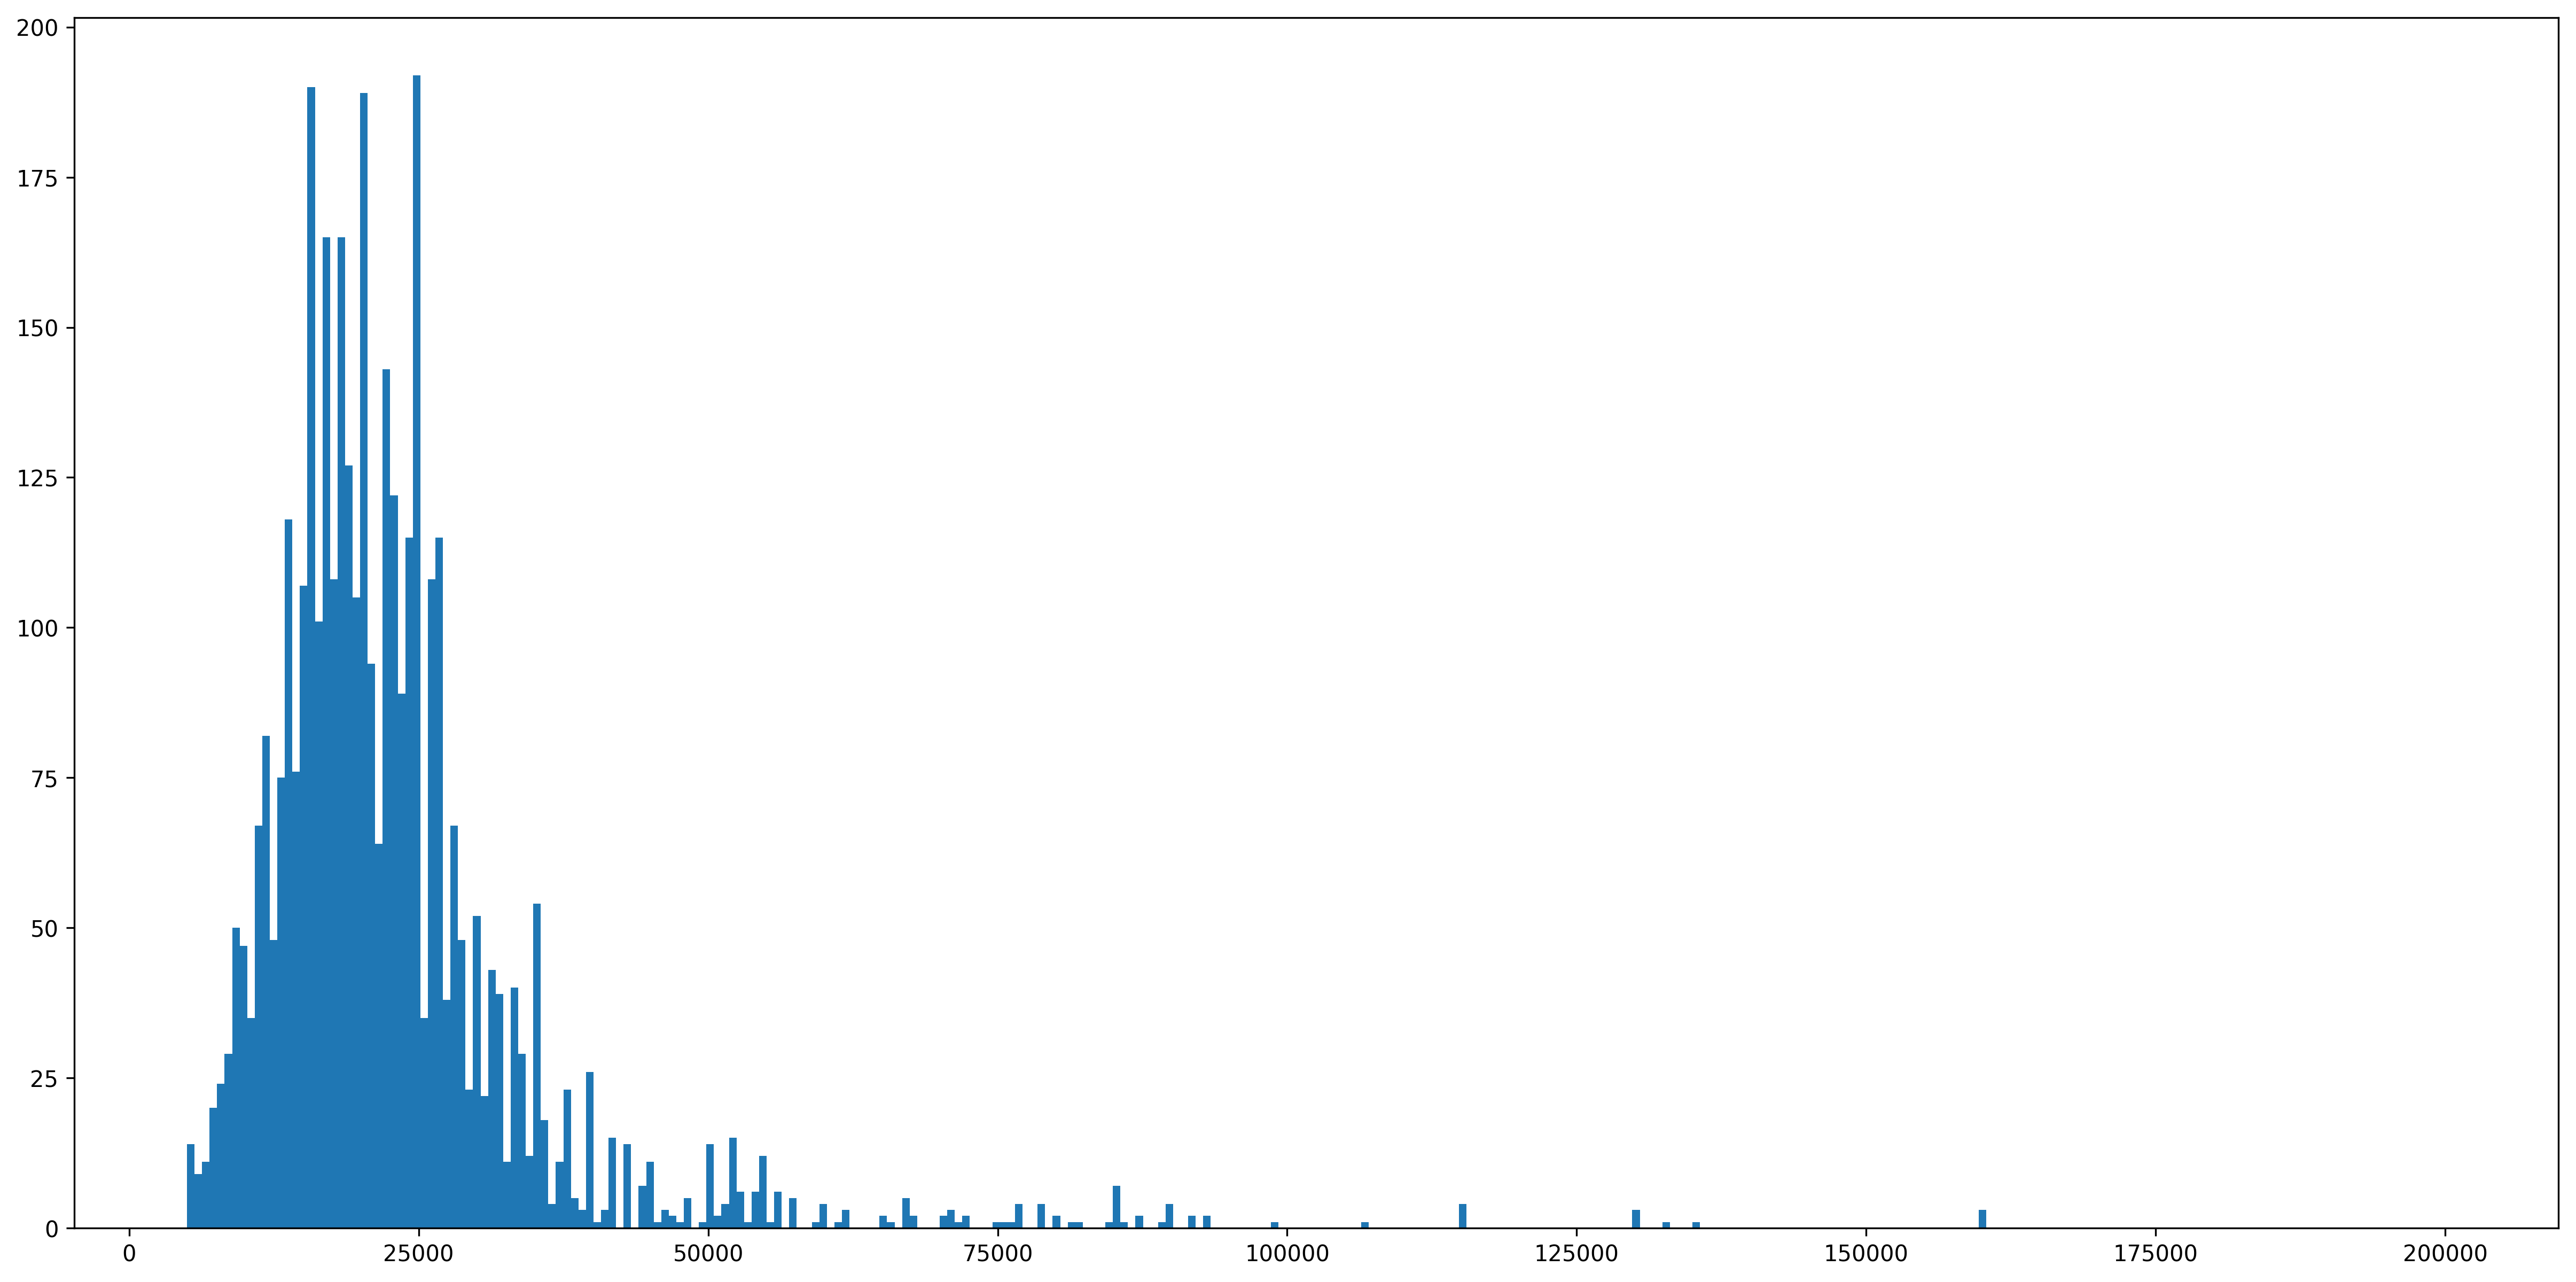

In [13]:
plt.figure(figsize=(20,10), dpi=300, facecolor='white')
plt.hist(price_USD.price[price_USD.rooms == 1], 300, range=(5000, 200000))
plt.show()

In [48]:
price_USD_by_district = price_USD[price_USD.district == 'Киевский']

In [65]:
price_square_meter = price_USD.price / price_USD.total_area

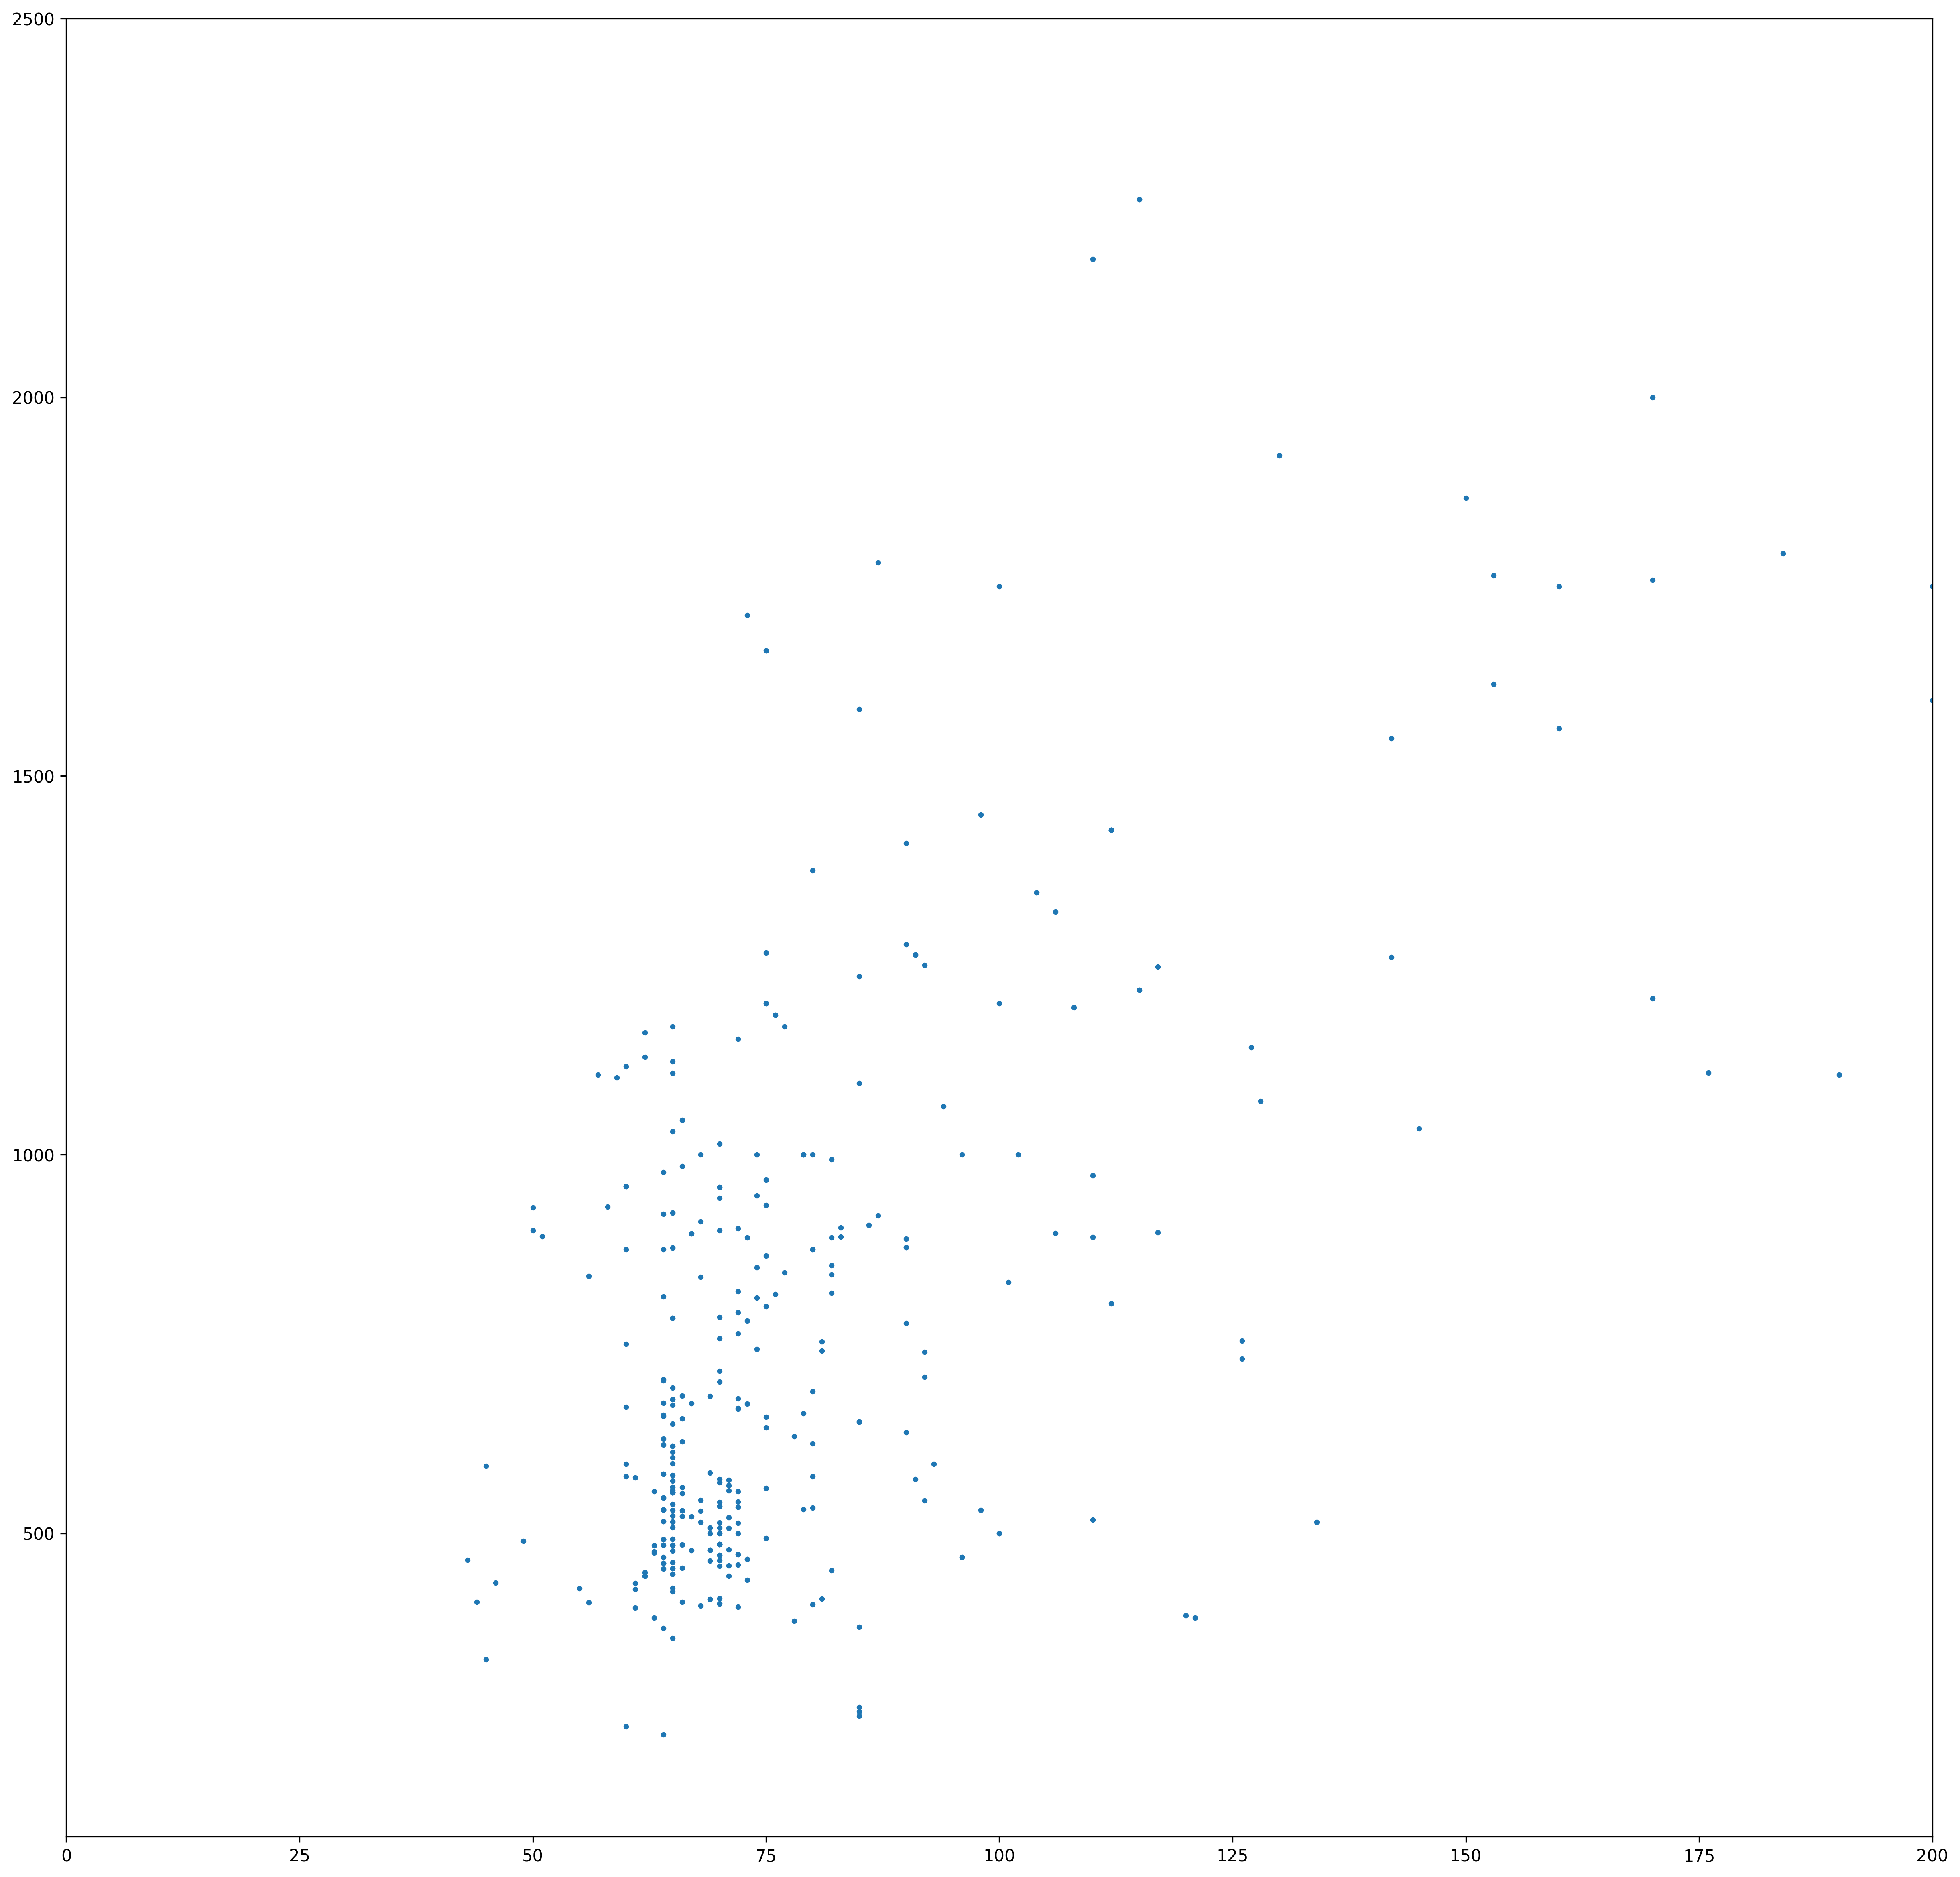

In [17]:
plt.figure(figsize=(20,20), dpi=300, facecolor='white')
filter_parameter = data.rooms == 3
plt.scatter(price_USD_by_district.total_area[filter_parameter], price_square_meter[filter_parameter], 5)
plt.xlim(0, 200)
plt.ylim(100, 2500)
plt.show()

C:\Users\ykab\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\ykab\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


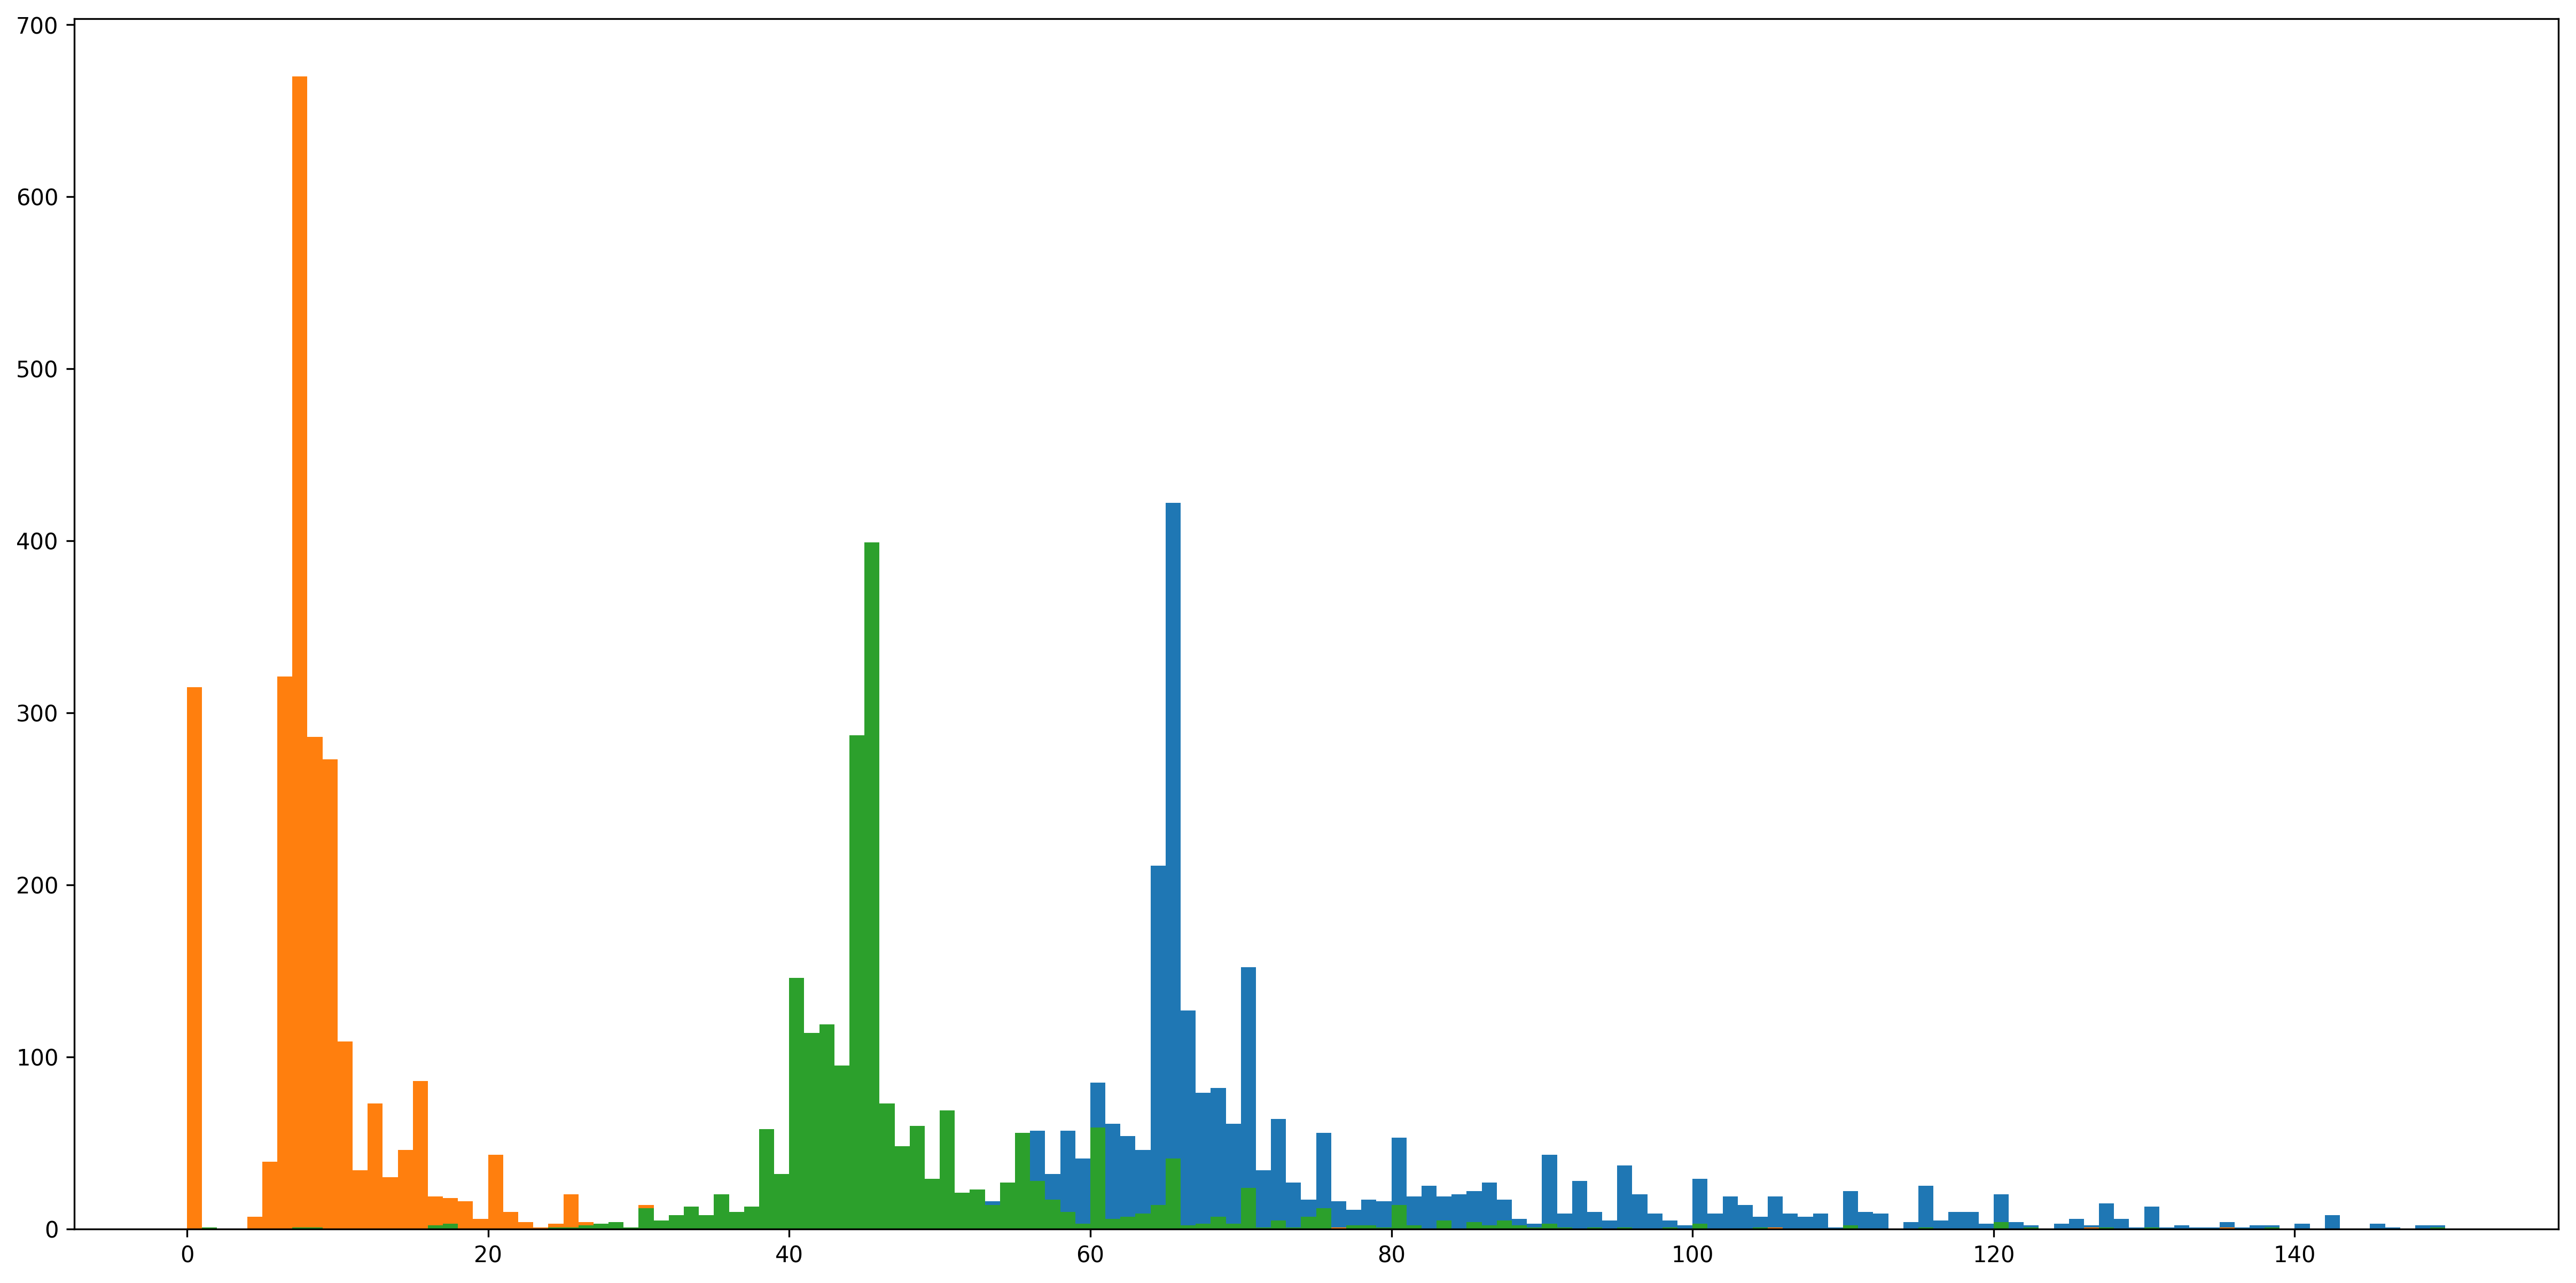

In [18]:
plt.figure(figsize=(20,10), dpi=300, facecolor='white')
plt.hist(data.total_area[data.rooms == 3], 150, range=(0, 150))
plt.hist(data.kitchen_area[data.rooms == 3], 150, range=(0, 150))
plt.hist(data.living_area[data.rooms == 3], 150, range=(0, 150))
plt.show()

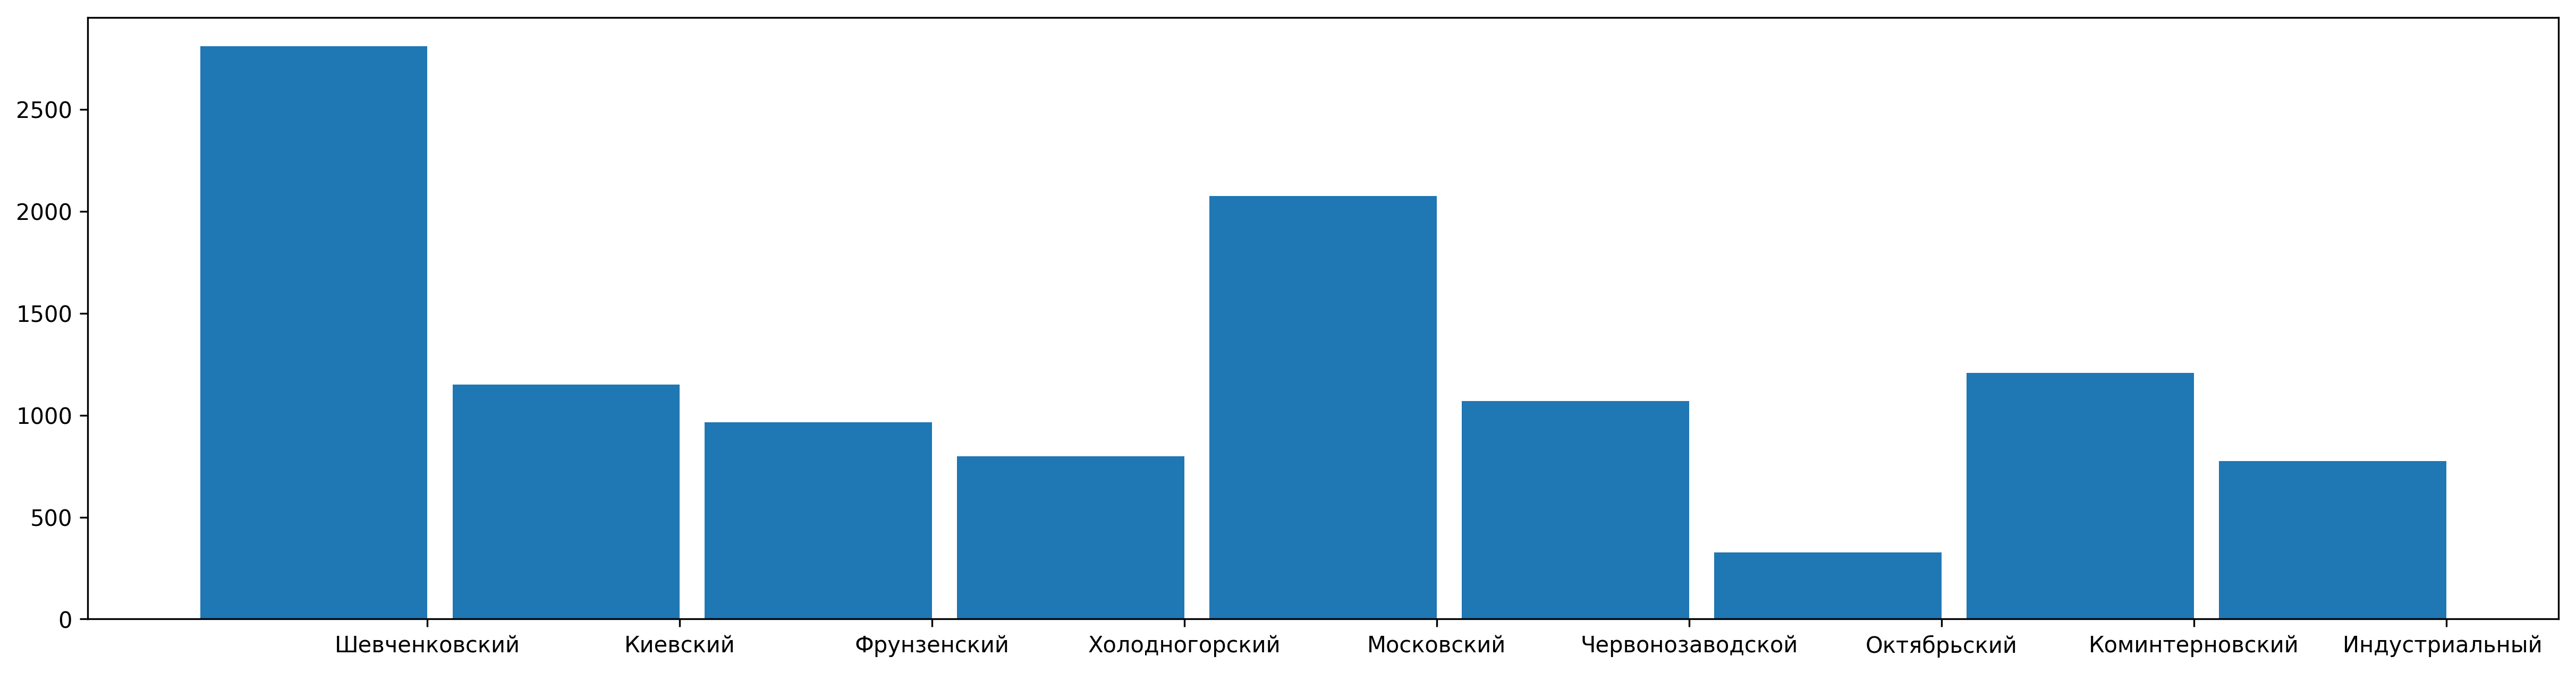

In [31]:
counter = Counter(data['district'])
district_names = counter.keys()
district_counts = counter.values()

# Plot histogram using matplotlib bar().
plt.figure(figsize=(20,5), dpi=300, facecolor='white')
indexes = np.arange(len(district_names))
width = 0.9
plt.bar(indexes, district_counts, width)
plt.xticks(indexes + width * 0.5, district_names)
plt.show()

In [32]:
counter.keys()

dict_keys(['Шевченковский', 'Киевский', 'Фрунзенский', 'Холодногорский', 'Московский', 'Червонозаводской', 'Октябрьский', 'Коминтерновский', 'Индустриальный '])

In [33]:
counter

Counter({'Индустриальный ': 775,
         'Киевский': 1149,
         'Коминтерновский': 1207,
         'Московский': 2074,
         'Октябрьский': 327,
         'Фрунзенский': 964,
         'Холодногорский': 799,
         'Червонозаводской': 1070,
         'Шевченковский': 2810})

In [34]:
counter.most_common()

[('Шевченковский', 2810),
 ('Московский', 2074),
 ('Коминтерновский', 1207),
 ('Киевский', 1149),
 ('Червонозаводской', 1070),
 ('Фрунзенский', 964),
 ('Холодногорский', 799),
 ('Индустриальный ', 775),
 ('Октябрьский', 327)]

In [35]:
price_USD.total_area.corr(price_square_meter)

0.38869428773802184

In [36]:
price_USD.total_area[data.rooms == 1].corr(price_square_meter[data.rooms == 1])

-0.012855187301682367

In [37]:
price_USD.total_area[data.rooms == 2].corr(price_square_meter[data.rooms == 2])

0.48762406942919395

In [38]:
price_USD.total_area[data.rooms == 3].corr(price_square_meter[data.rooms == 3])

0.60435304565905135

In [39]:
price_USD.total_area[data.rooms == 4].corr(price_square_meter[data.rooms == 4])

0.77688506908845101

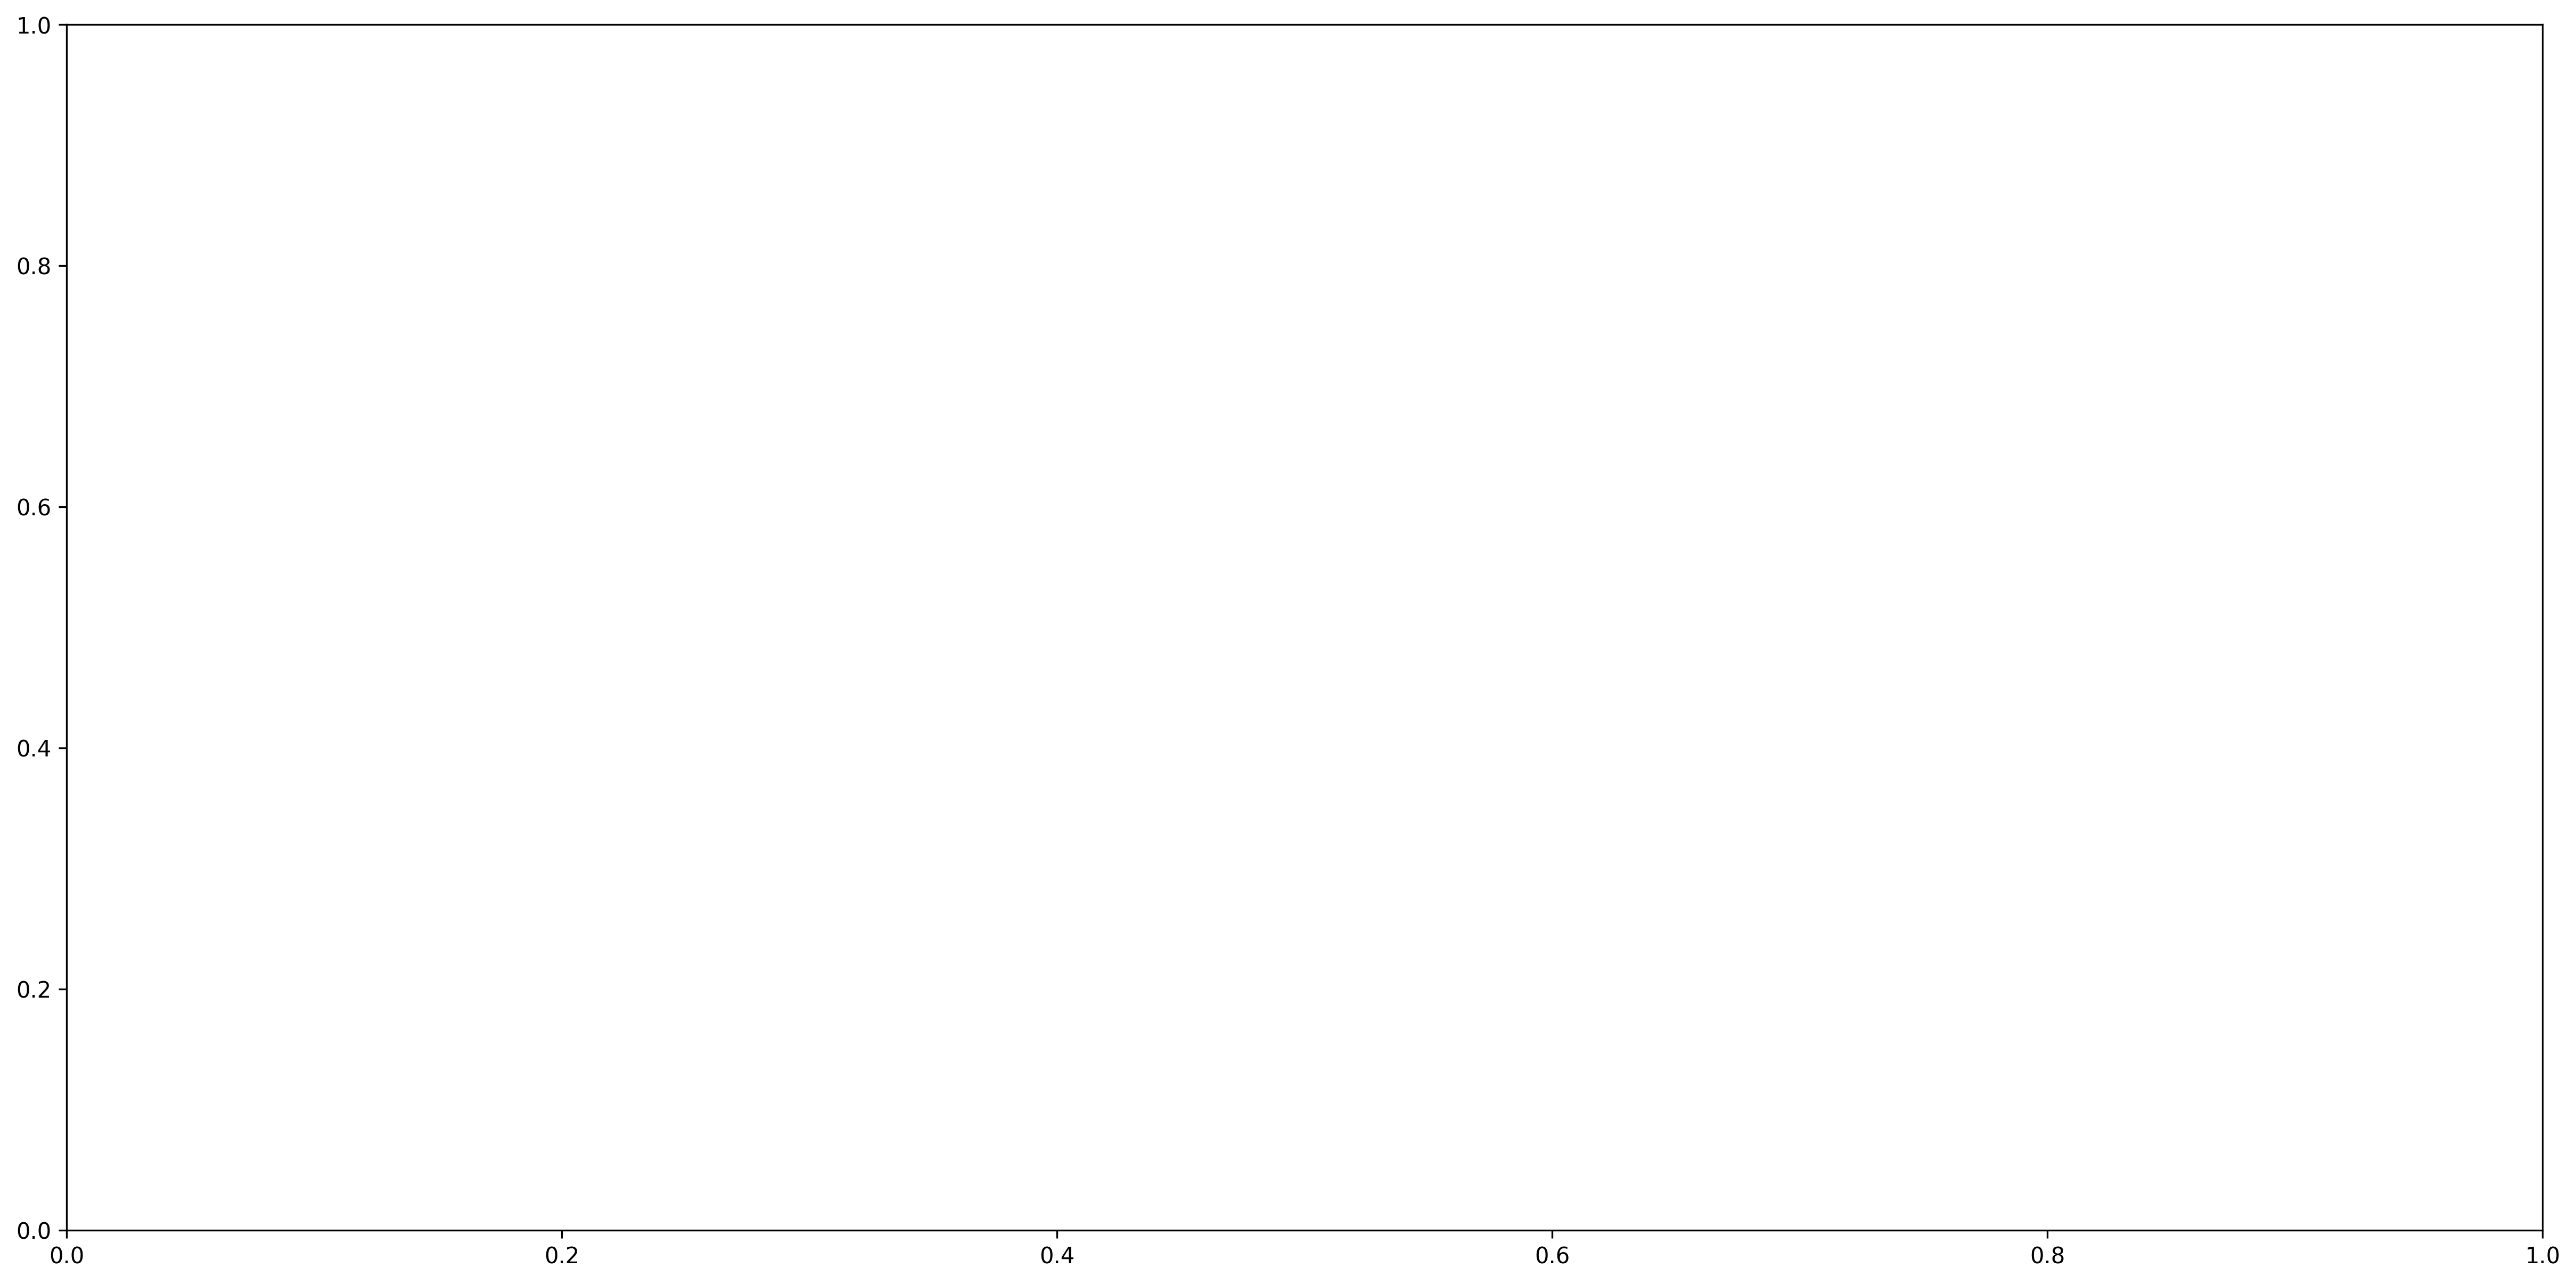

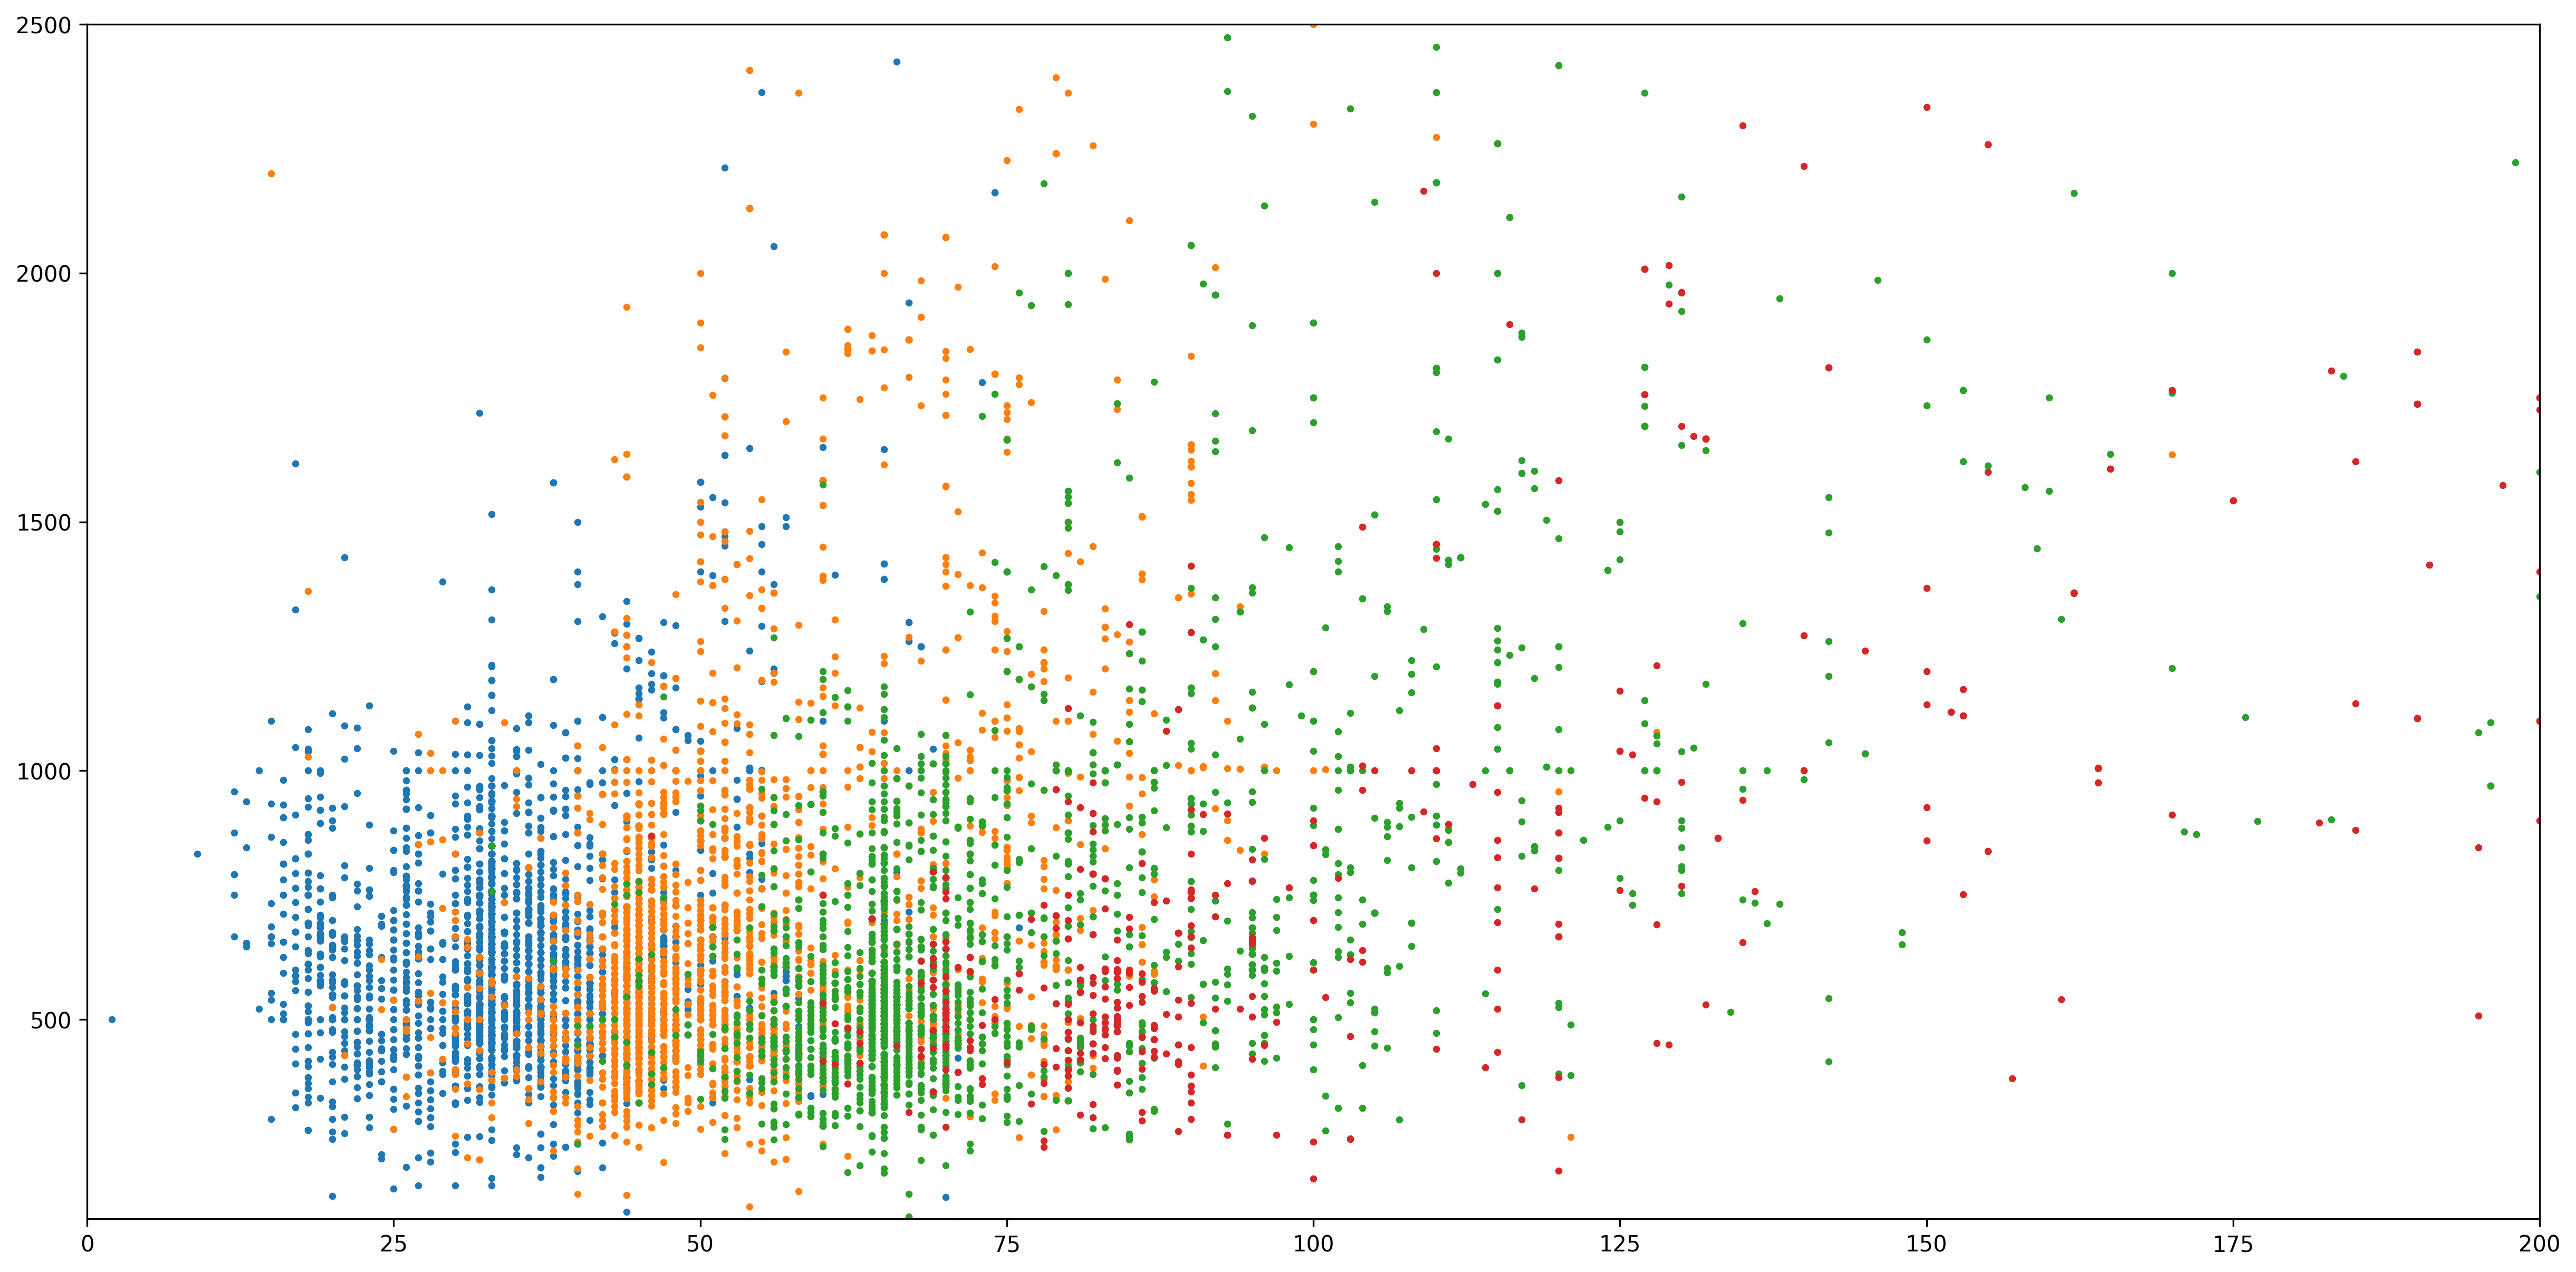

In [66]:
plt.figure(figsize=(20,10), dpi=300, facecolor='white')
for room in range(1, 5):
    filter_parameter = data.rooms == room
    plt.scatter(price_USD.total_area[filter_parameter], price_square_meter[filter_parameter], 5)
    plt.xlim(0, 200)
    plt.ylim(100, 2500)
plt.show()

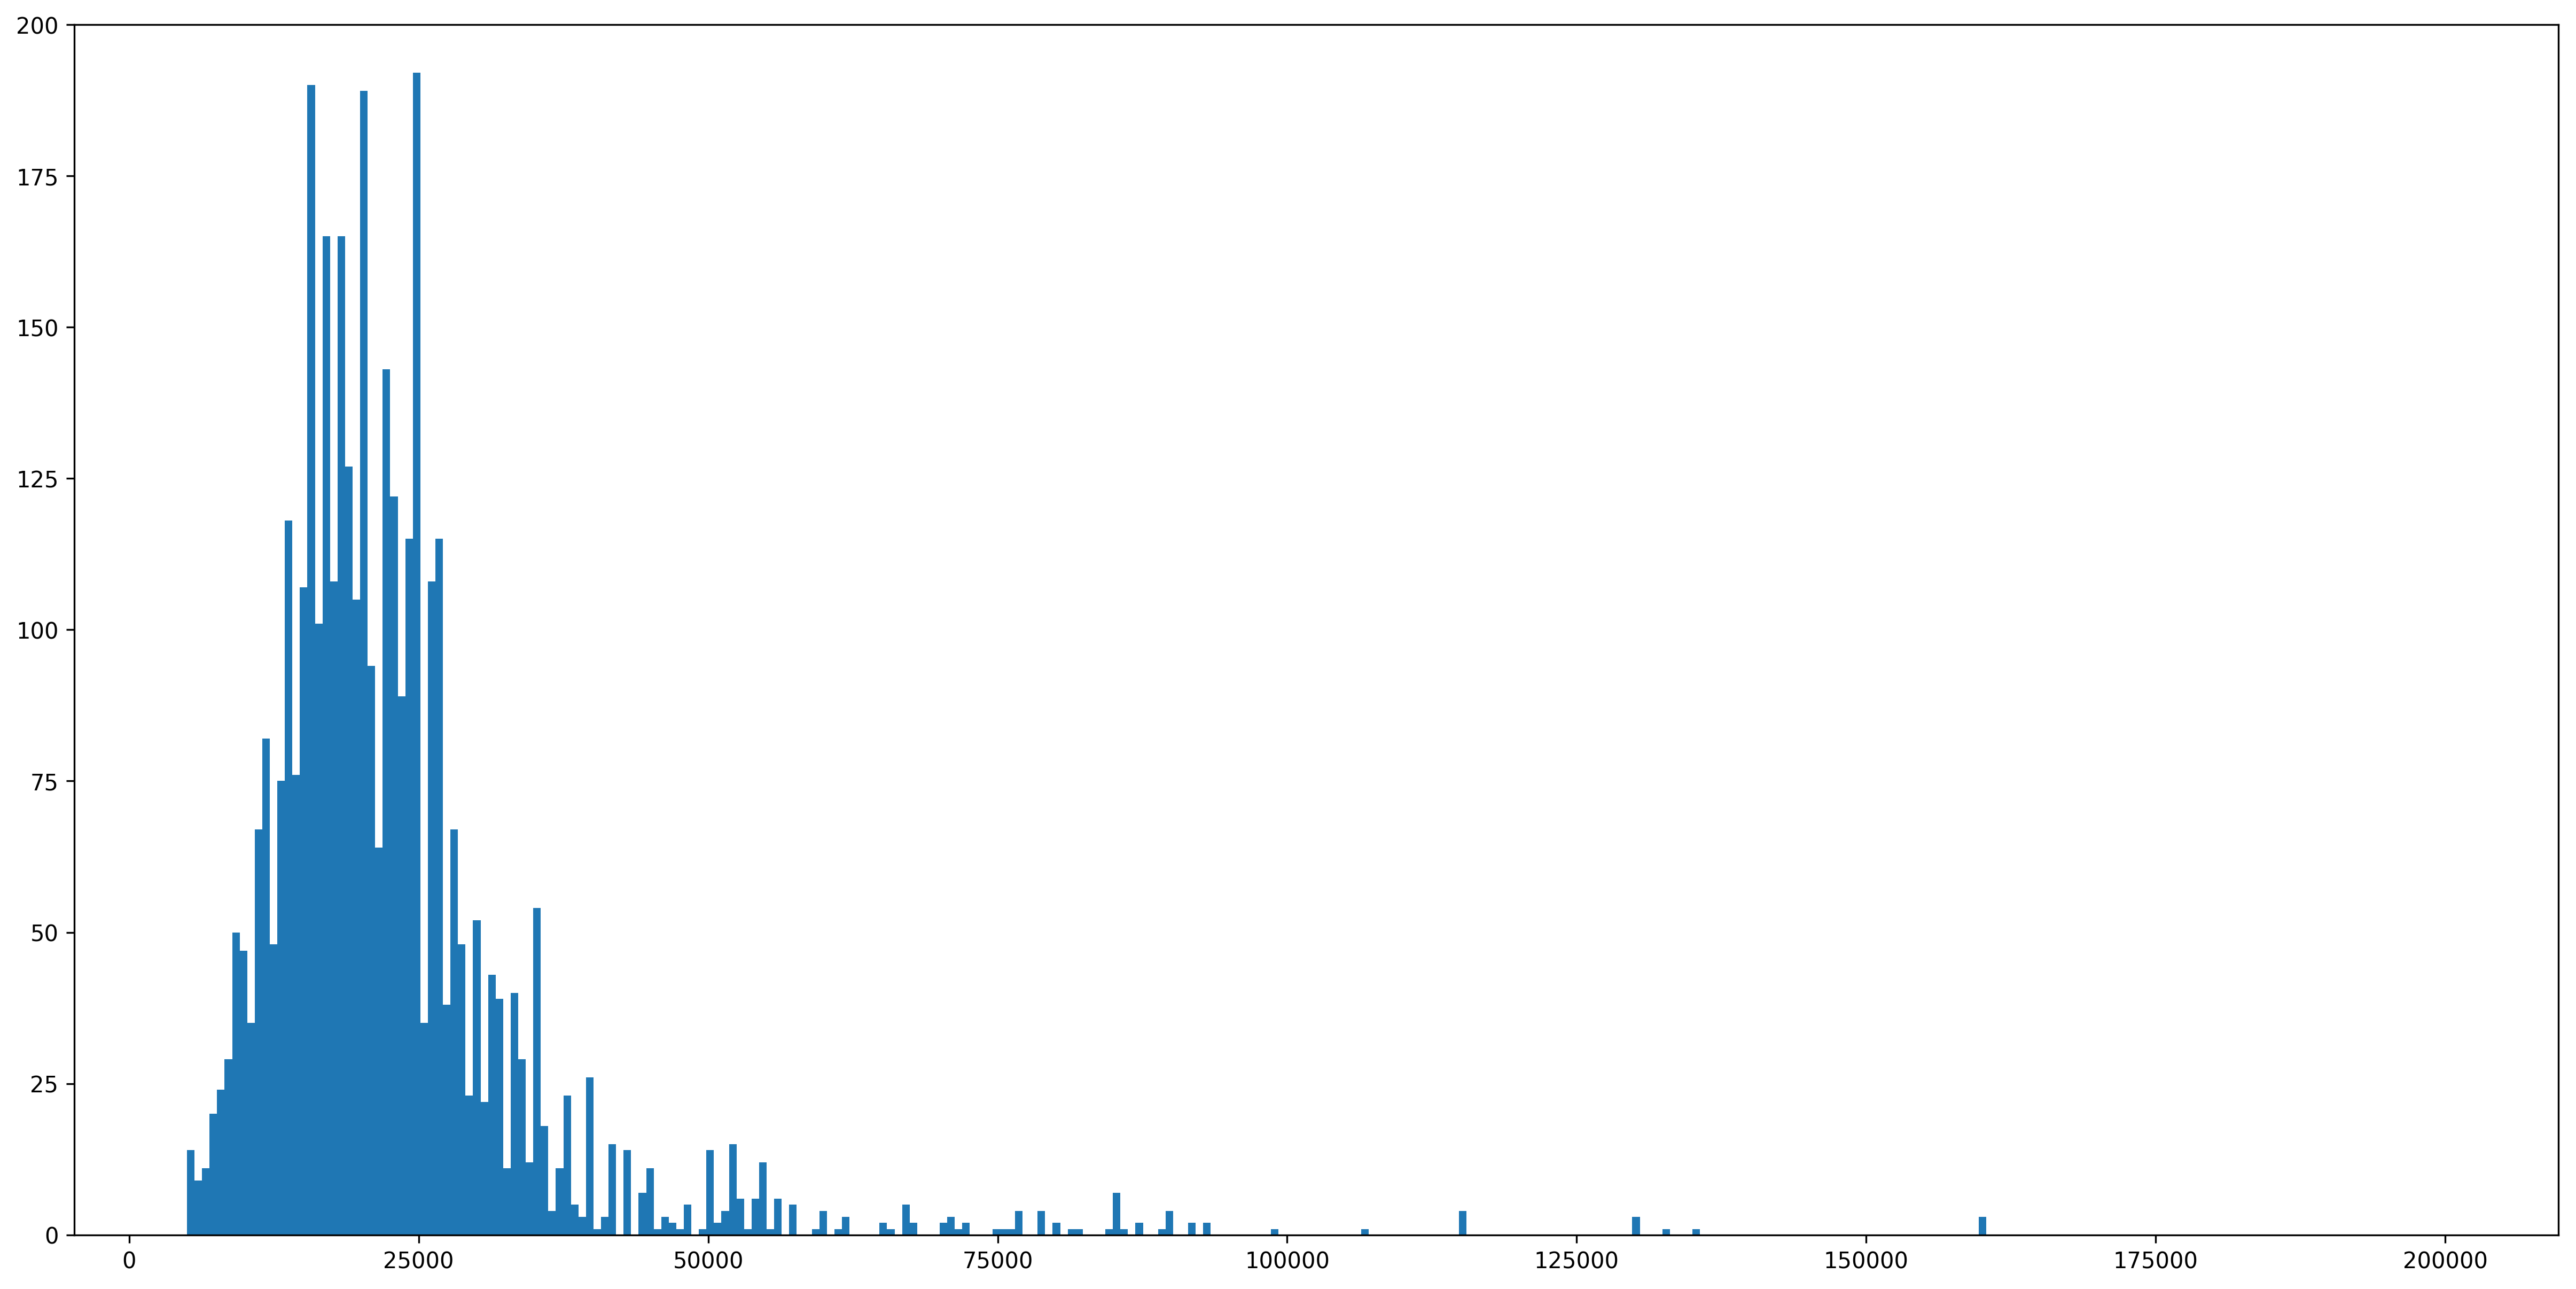

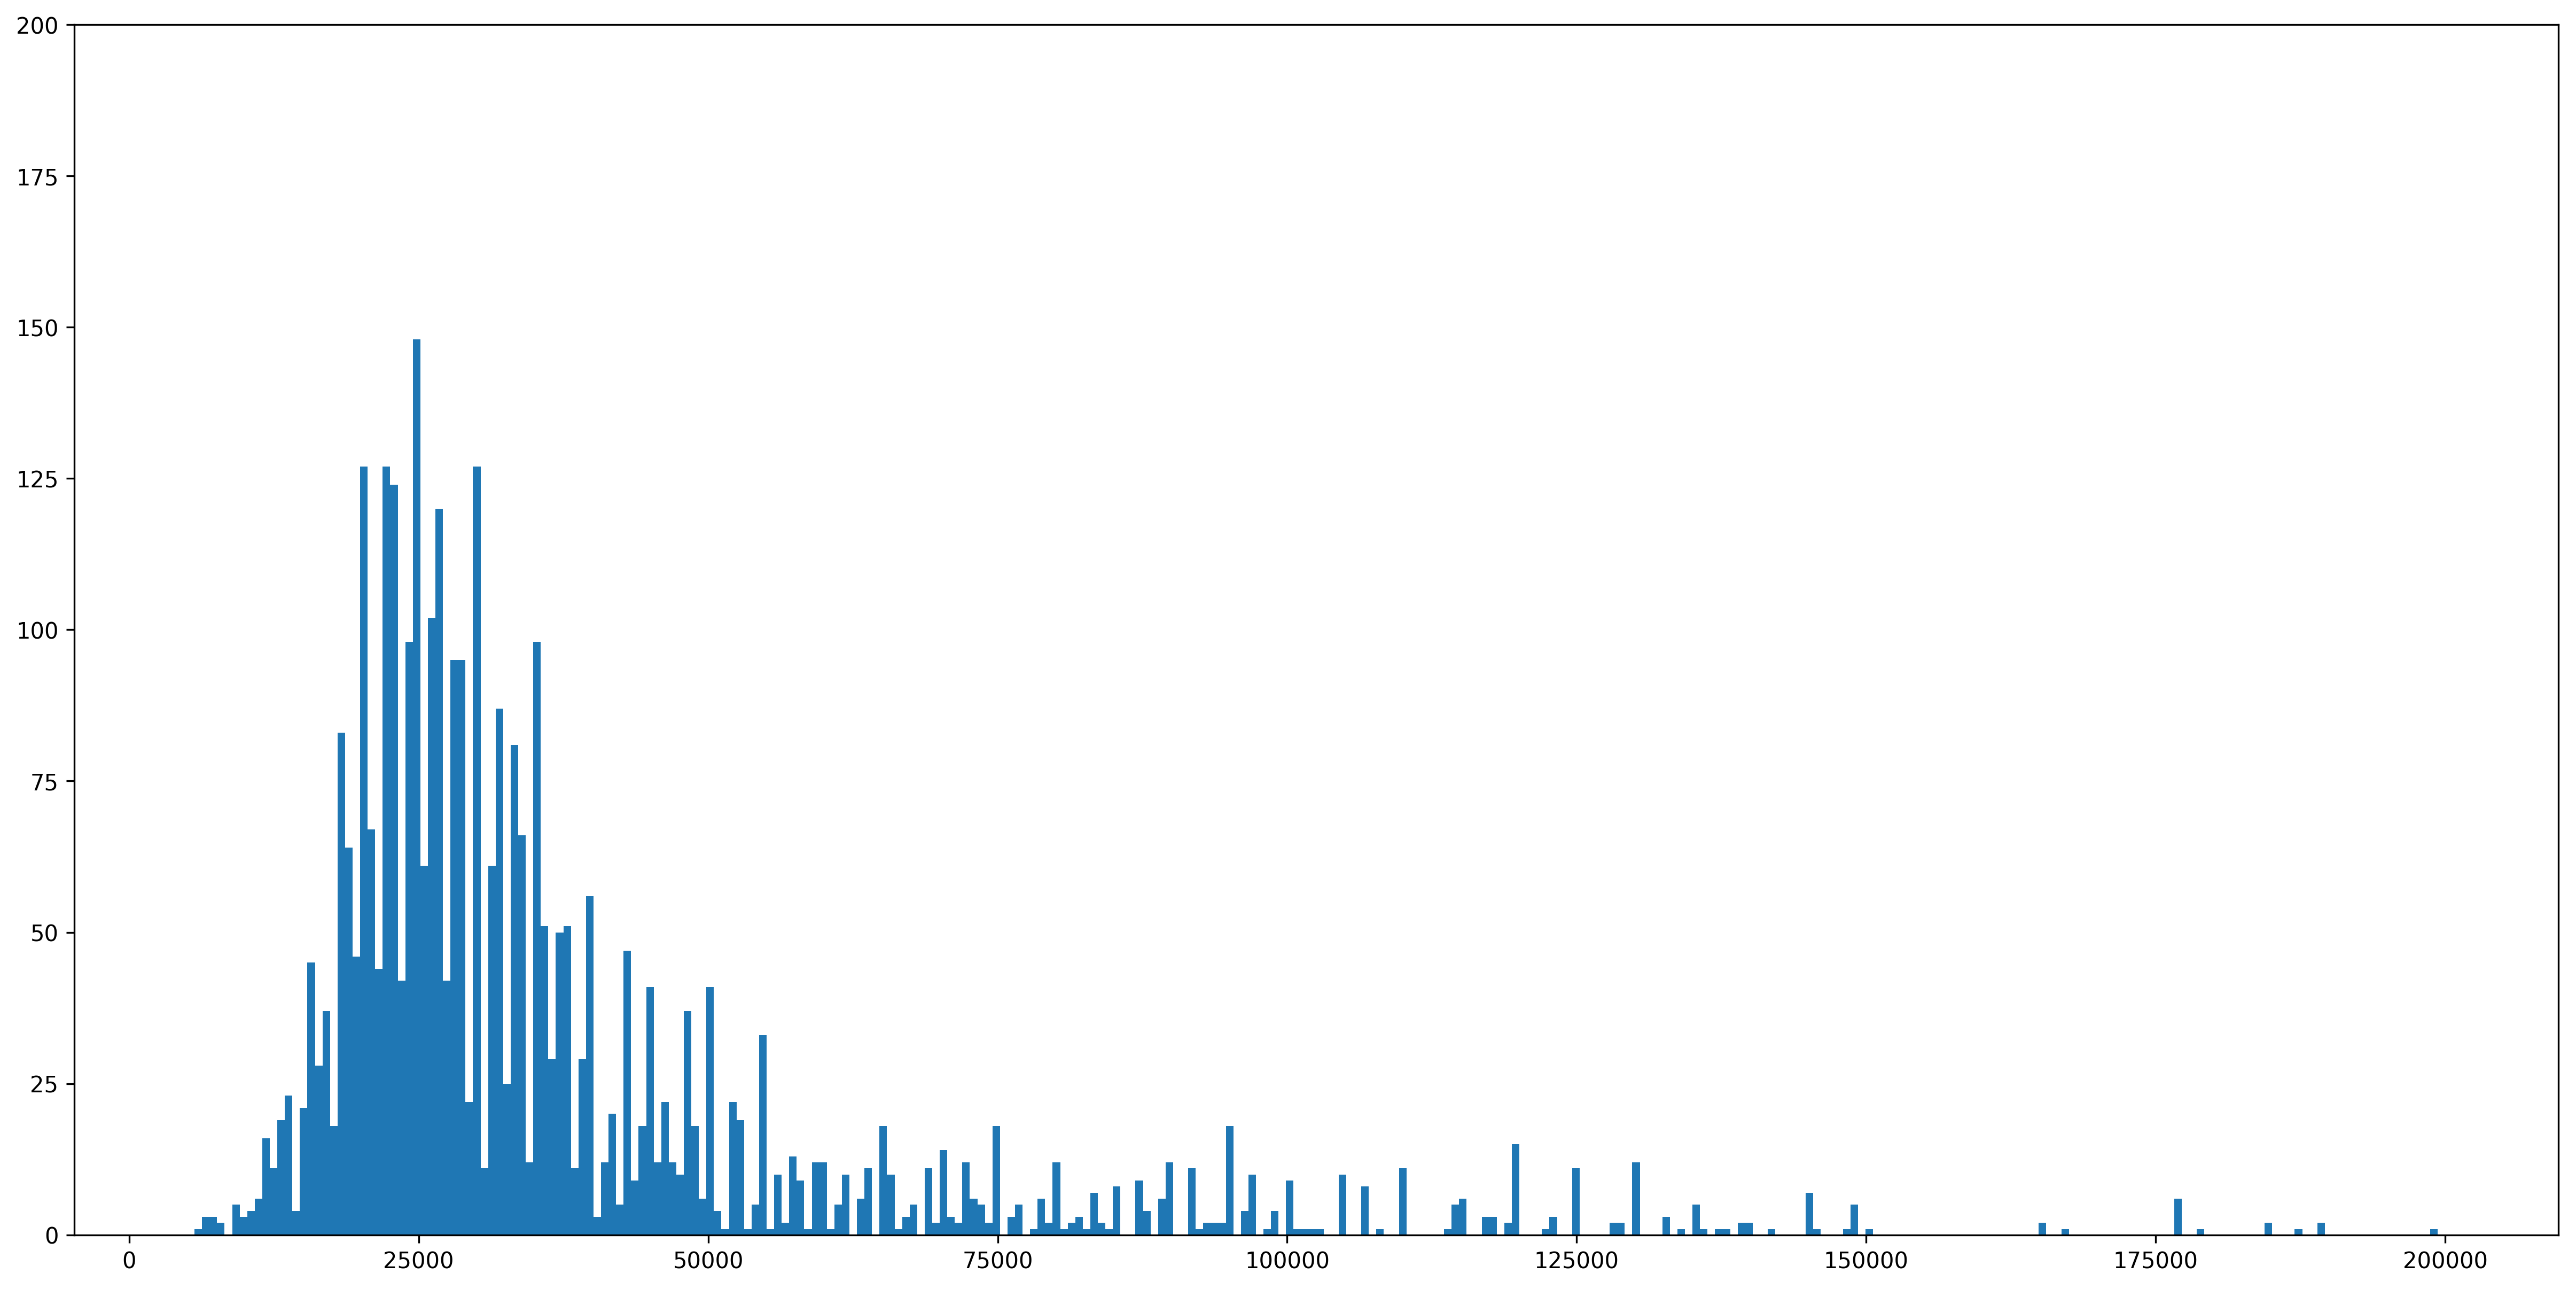

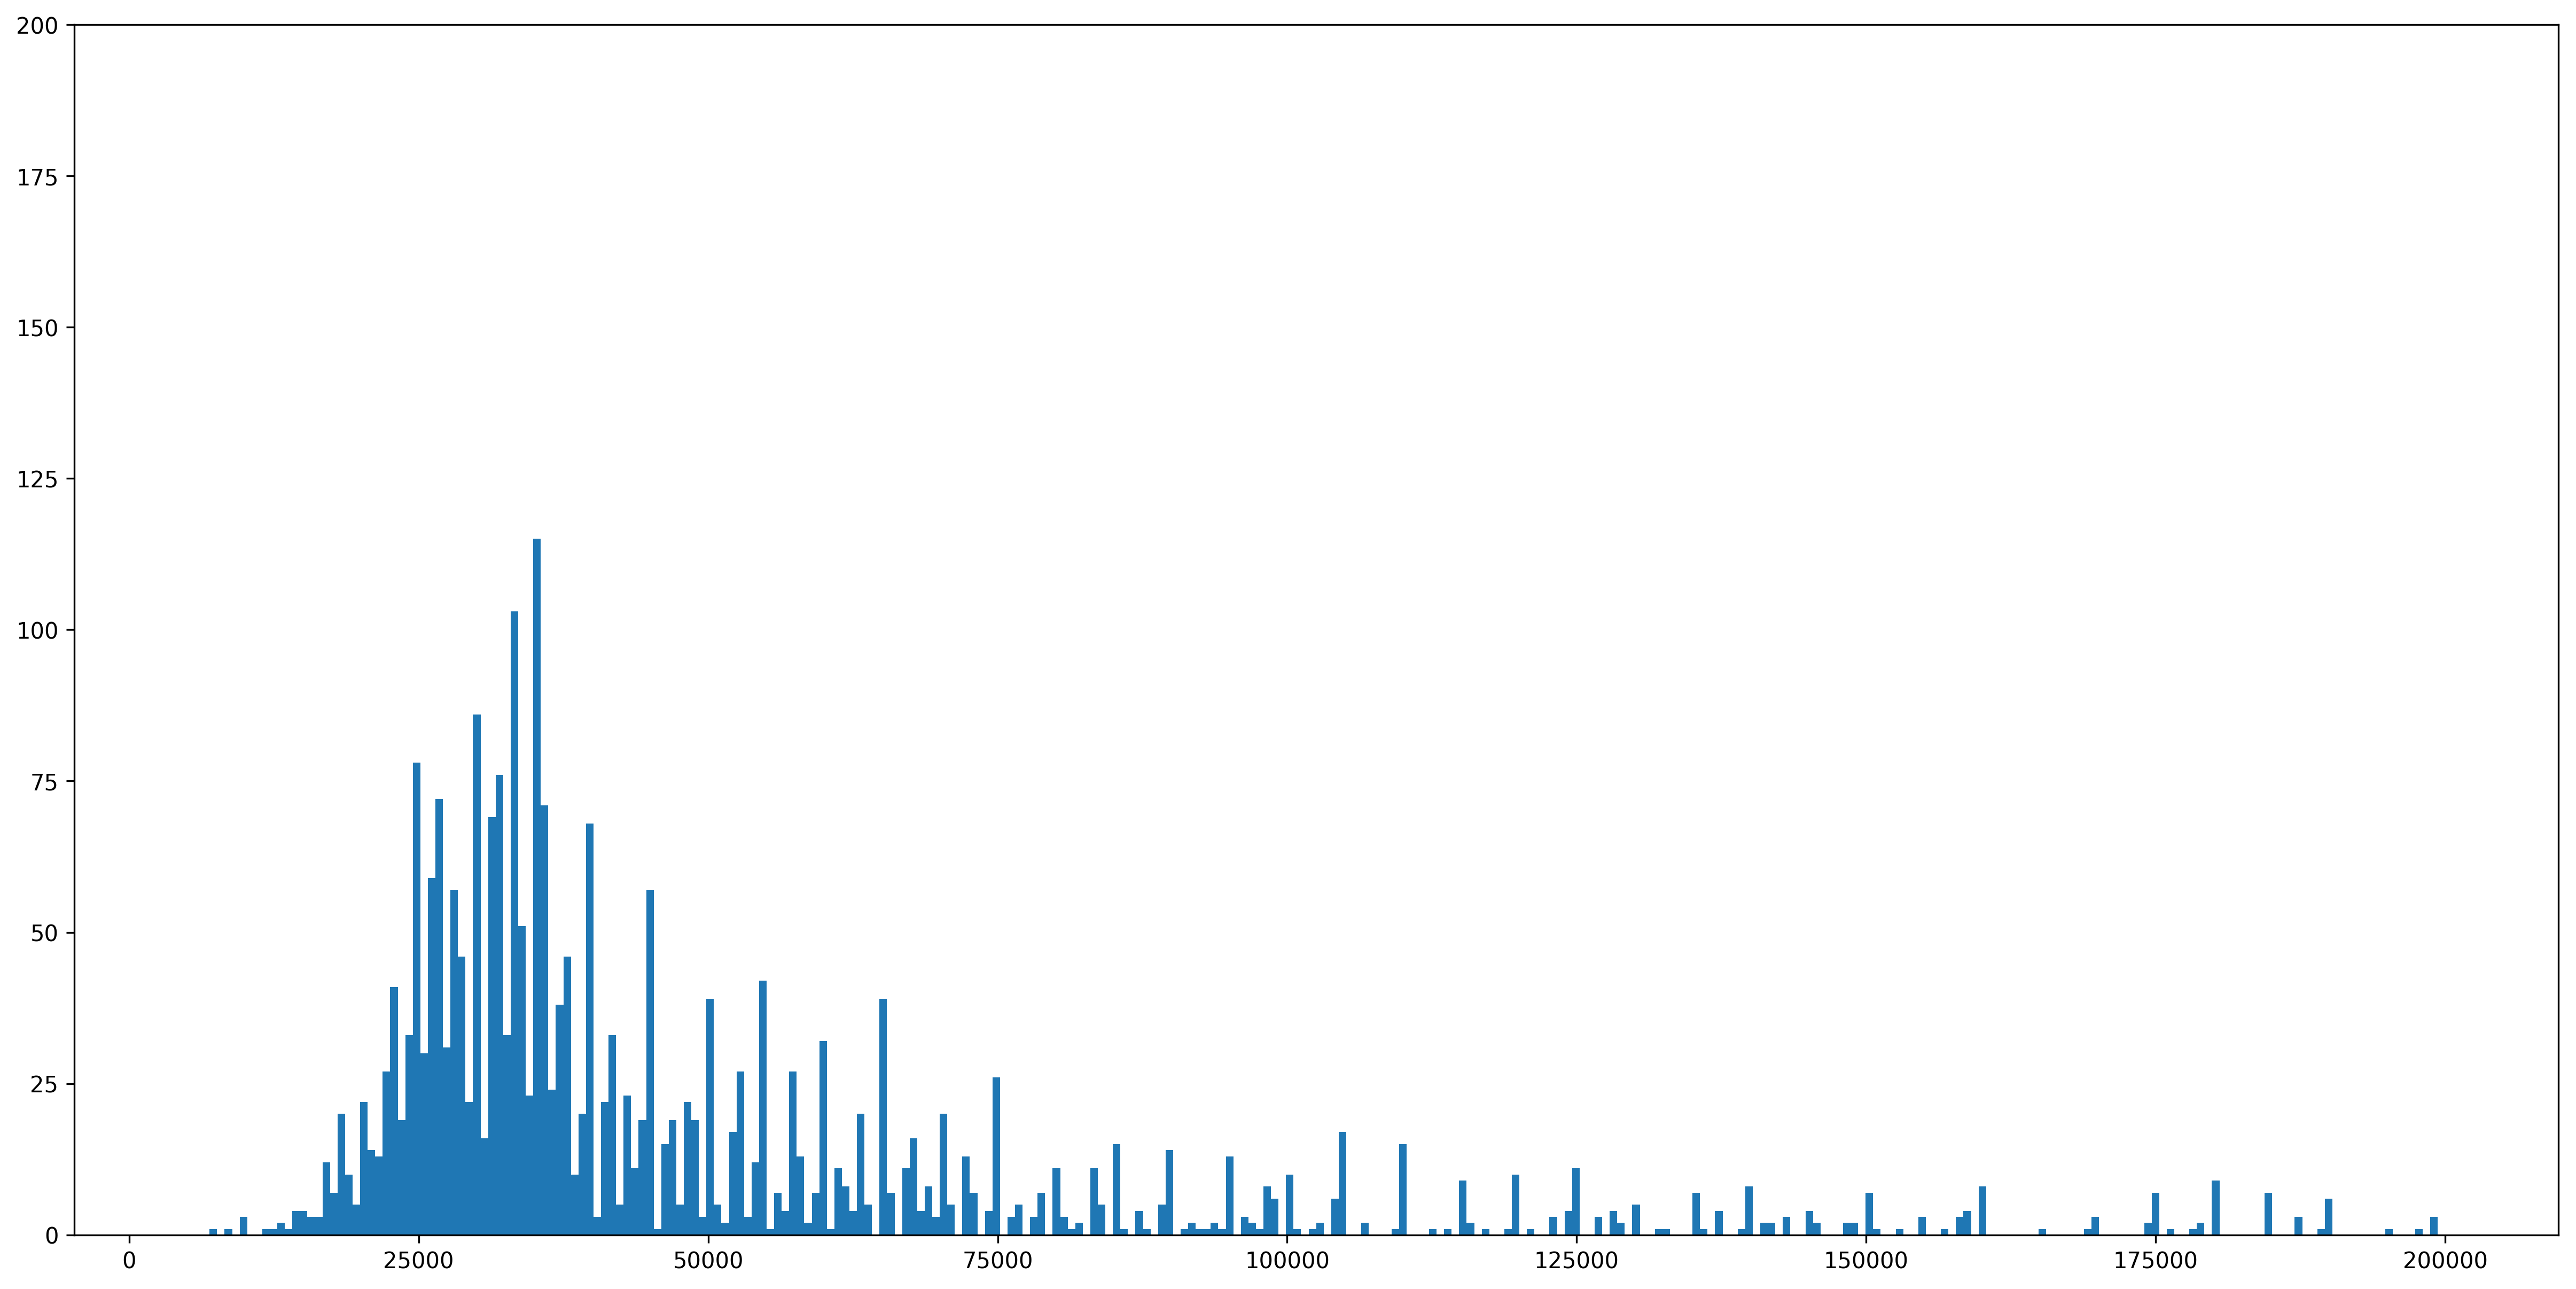

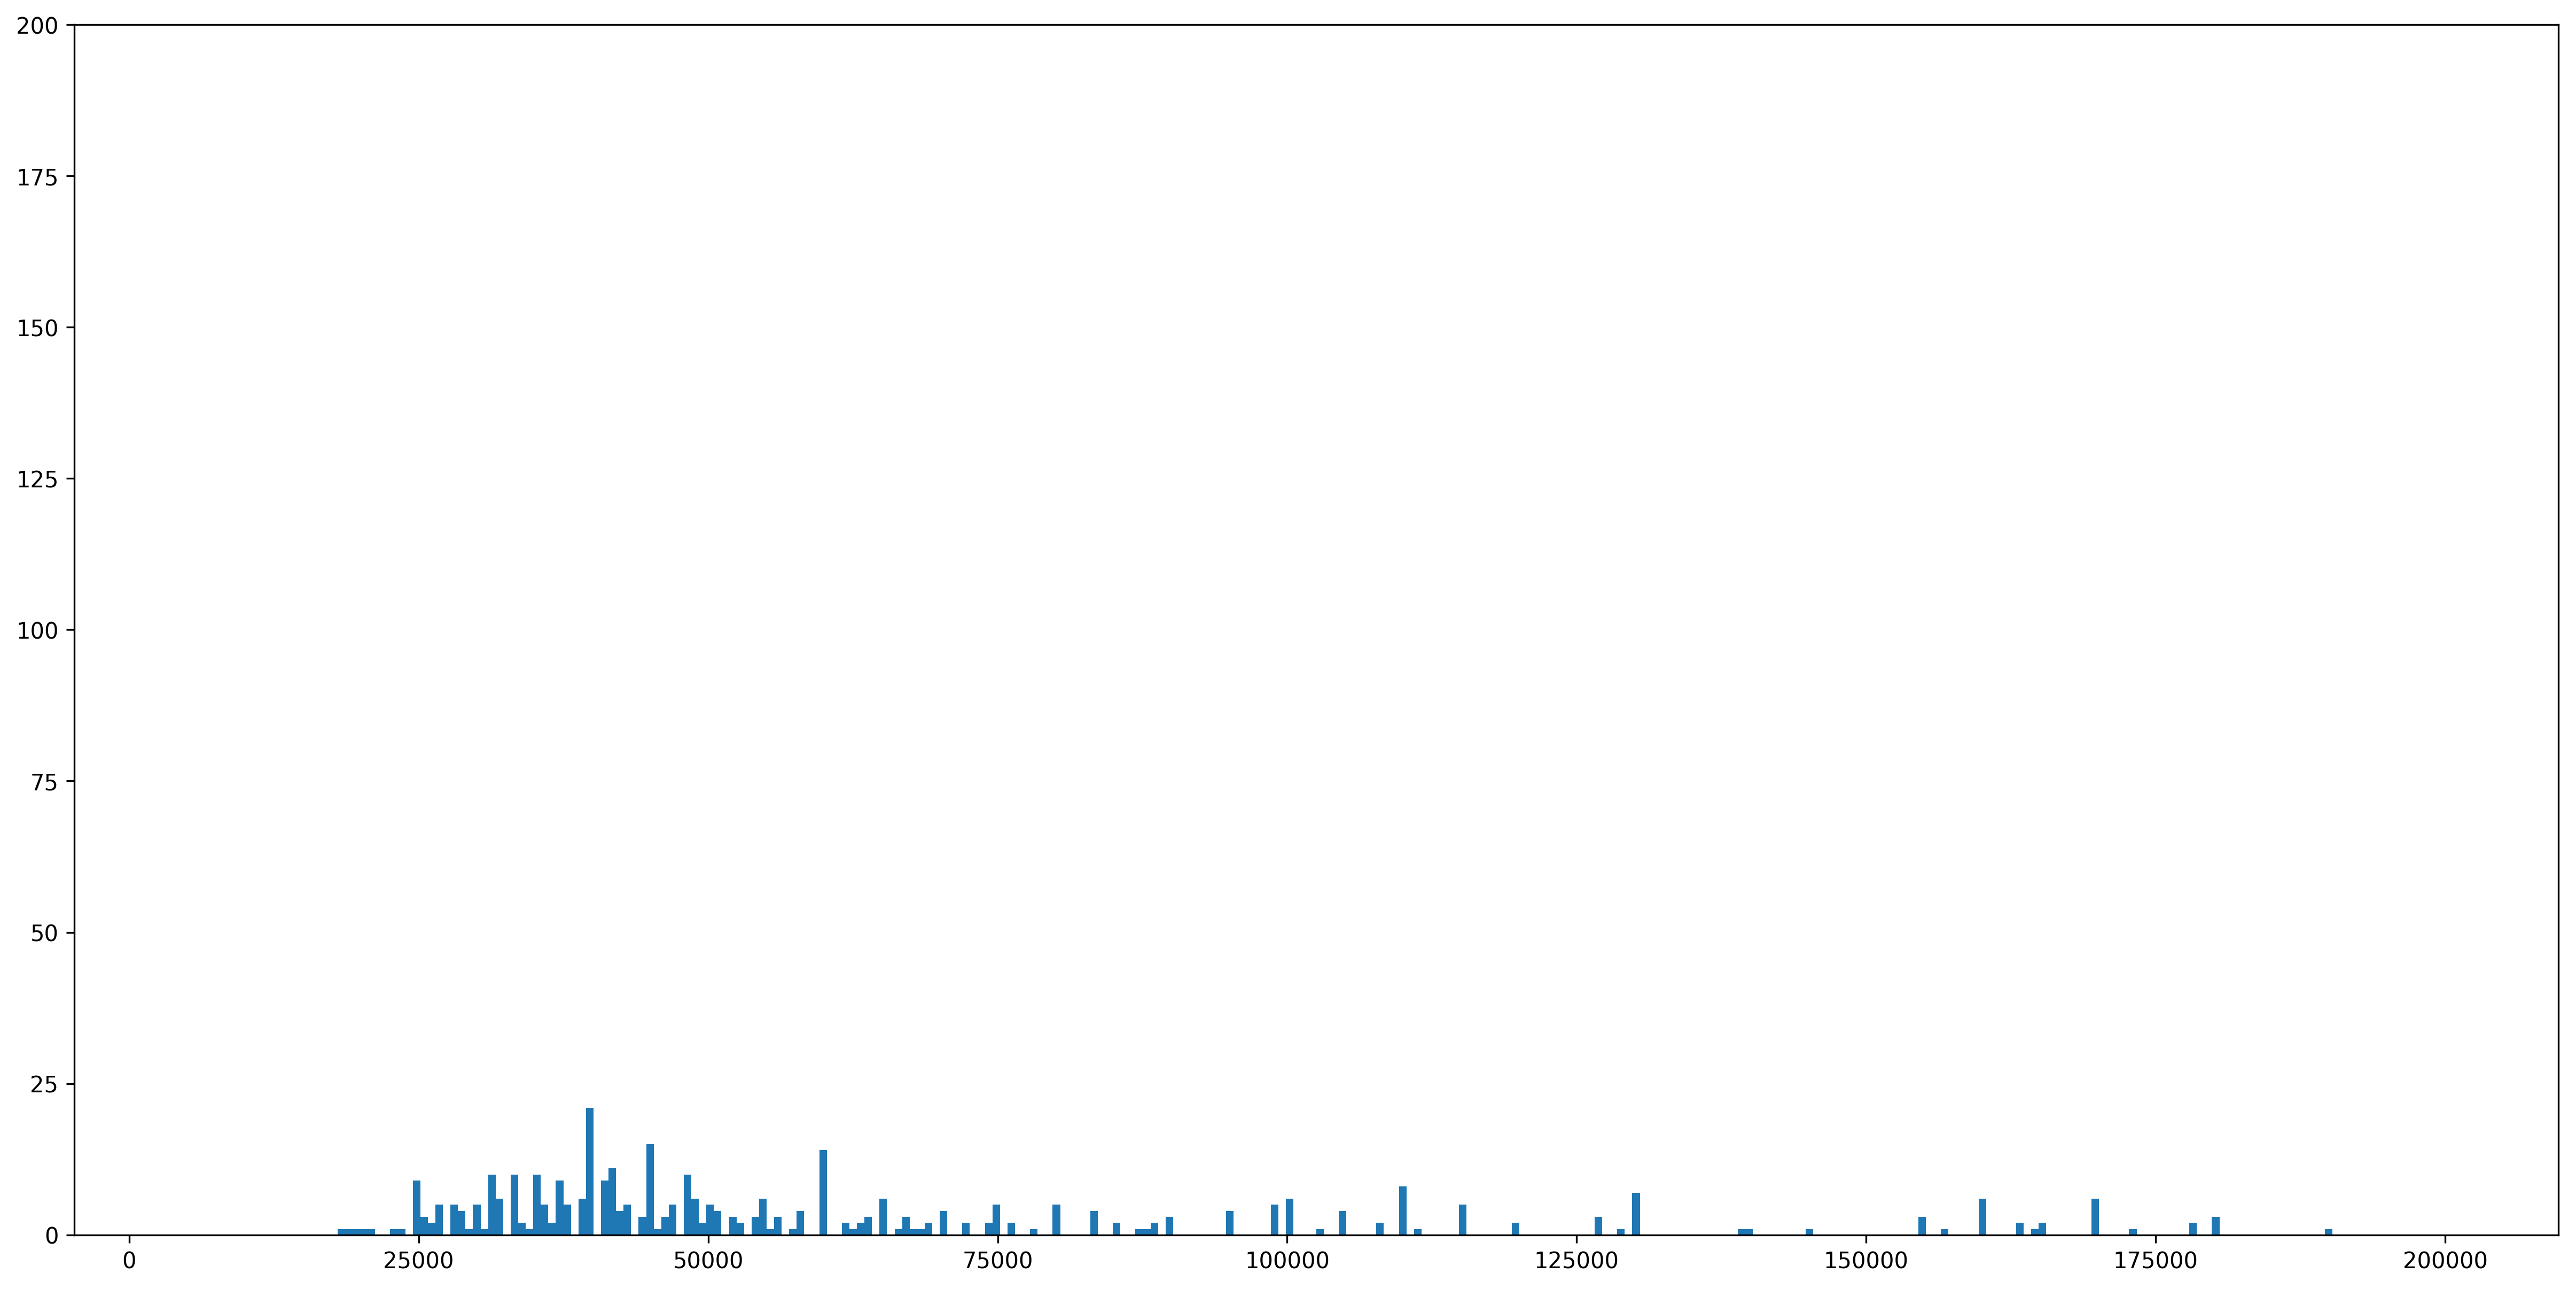

In [47]:
for room in range(1, 5):
    plt.figure(figsize=(20,10), dpi=300, facecolor='white')
    plt.hist(price_USD.price[price_USD.rooms == room], 300, range=(5000, 200000))
    axes = plt.gca()
    axes.set_ylim([0, 200])
plt.show()

In [ ]:
counter = Counter(data['offer_added_date'])
district_names = counter.keys()
district_counts = counter.values()

# Plot histogram using matplotlib bar().
plt.figure(figsize=(20,5), dpi=300, facecolor='white')
indexes = np.arange(len(district_names))
width = 0.9
plt.bar(indexes, district_counts, width)
plt.xticks(indexes + width * 0.5, district_names, rotation=45)
plt.show()

C:\Users\ykab\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\ykab\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


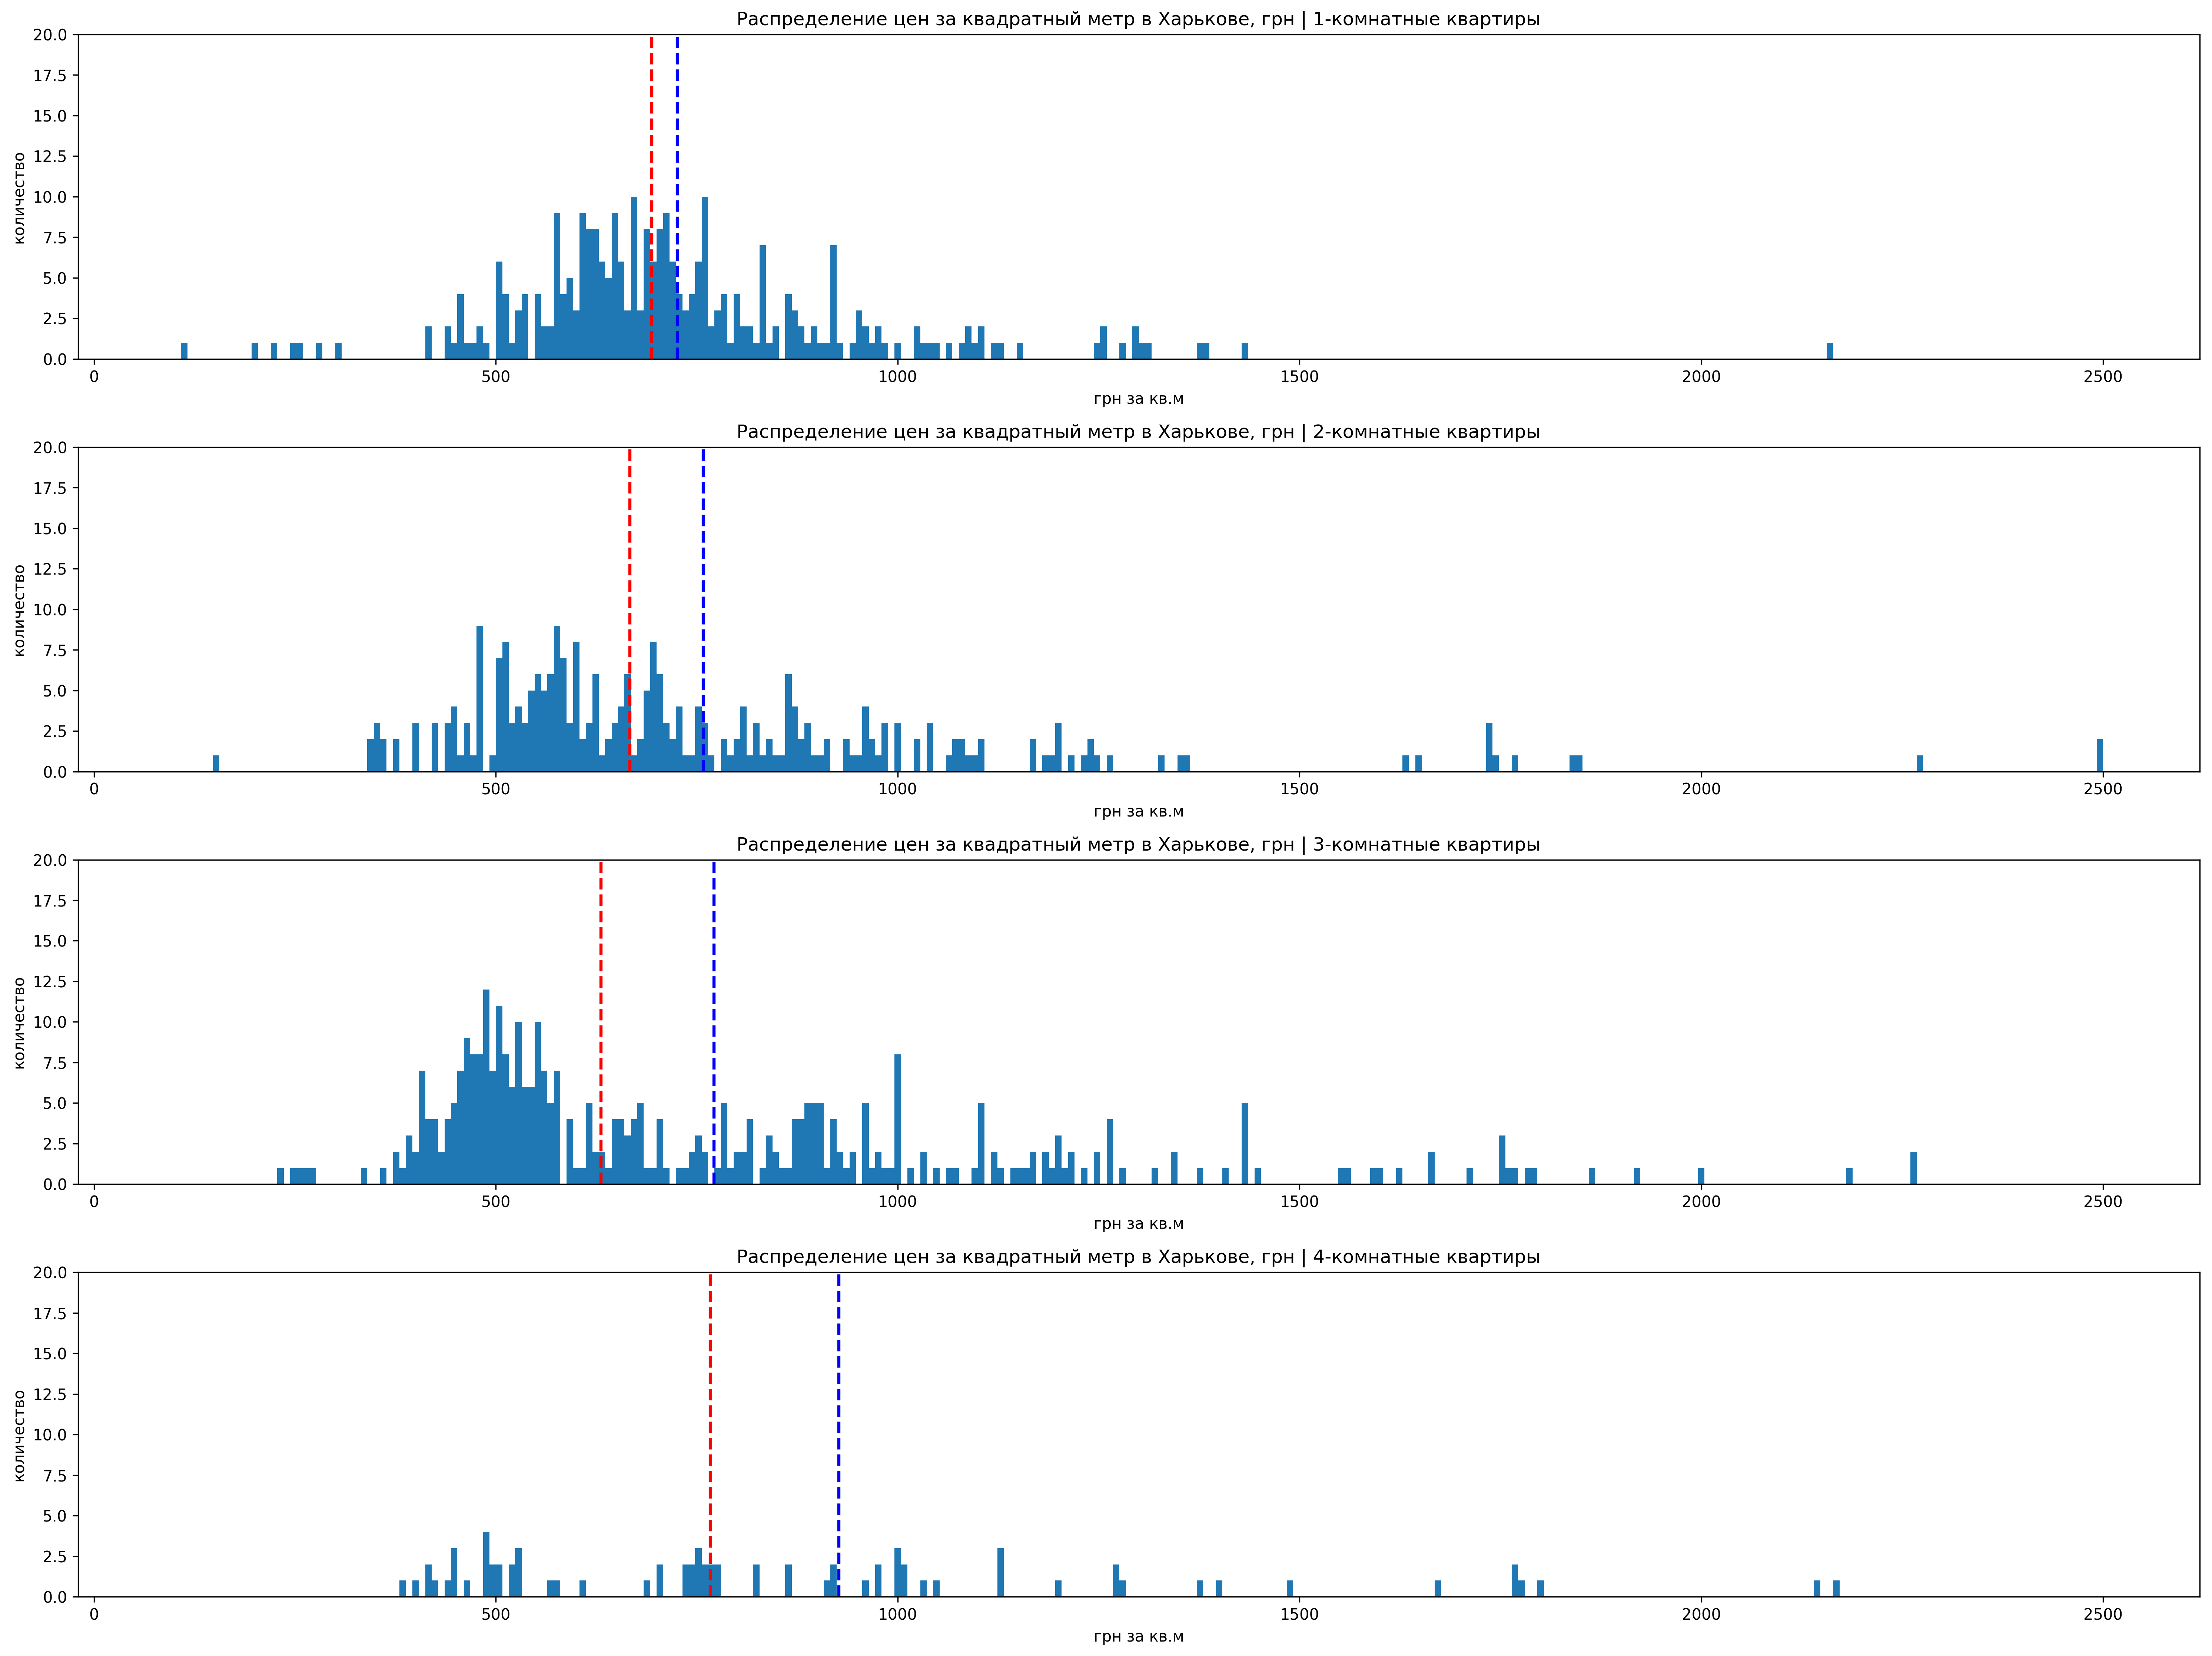

In [29]:
plt.figure(figsize=(20,15), dpi=300, facecolor='white')

for room in range(1,5):
    plt.subplot(4,1,room)
    plt.title('Распределение цен за квадратный метр в Харькове, грн | {0}-комнатные квартиры'.format(room))
    plt.hist(price_square_meter[data.rooms == room], 300, range=(100,2500))
    plt.axvline(price_square_meter[data.rooms == room].mean(), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(price_square_meter[data.rooms == room].median(), color='r', linestyle='dashed', linewidth=2)
    axes = plt.gca()
    axes.set_ylim([0, 20])
    plt.xlabel('грн за кв.м')
    plt.ylabel('количество')
plt.tight_layout()
plt.show()

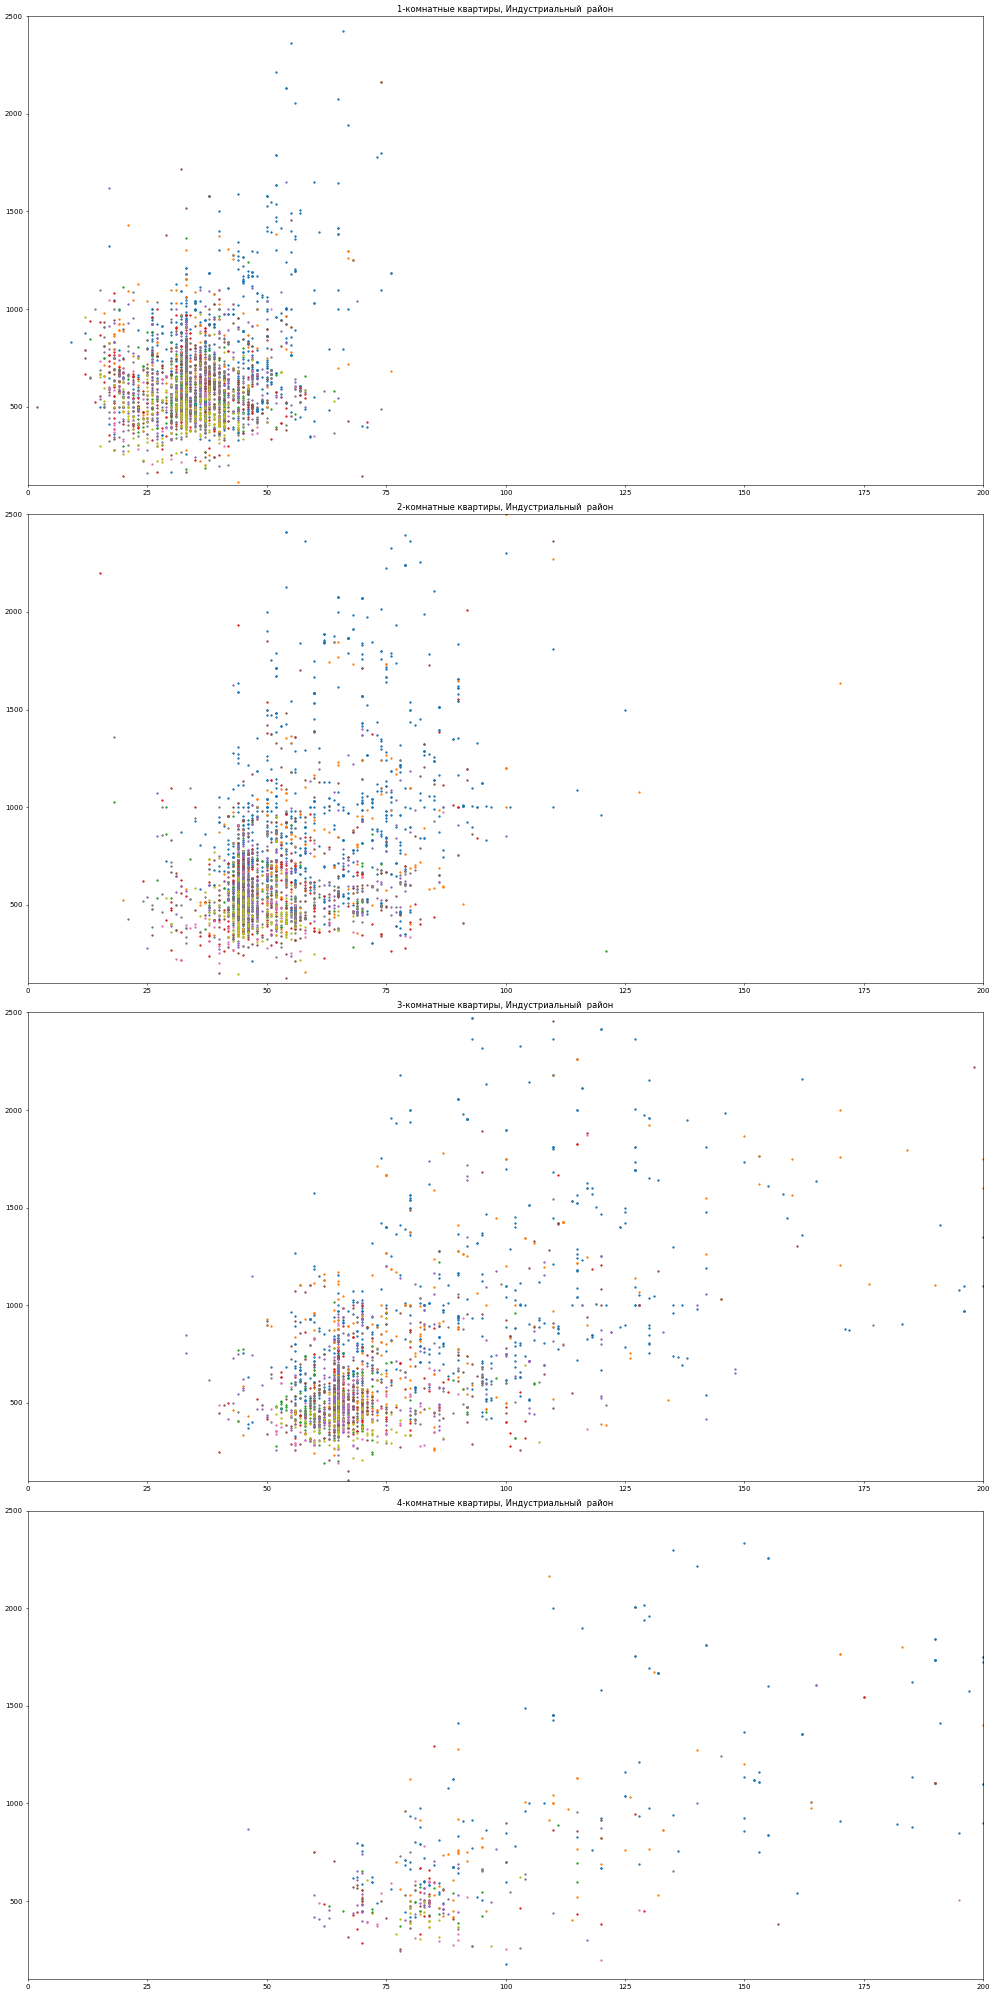

In [75]:
counter = Counter(data['district'])
district_names = counter.keys()

plt.figure(figsize=(20, 40), dpi=50, facecolor='white')

for district in district_names:
    price_USD_by_district = price_USD[price_USD.district == district]
    price_square_meter = price_USD_by_district.price / price_USD_by_district.total_area
    for room in range(1, 5):
        plt.subplot(4,1,room)
        filter_parameter = data.rooms == room
        plt.title('{0}-комнатные квартиры, {1} район'.format(room, district))
        plt.scatter(price_USD_by_district.total_area[filter_parameter], price_square_meter[filter_parameter], 5)
        plt.xlim(0, 200)
        plt.ylim(100, 2500)
        plt.tight_layout()
plt.show()

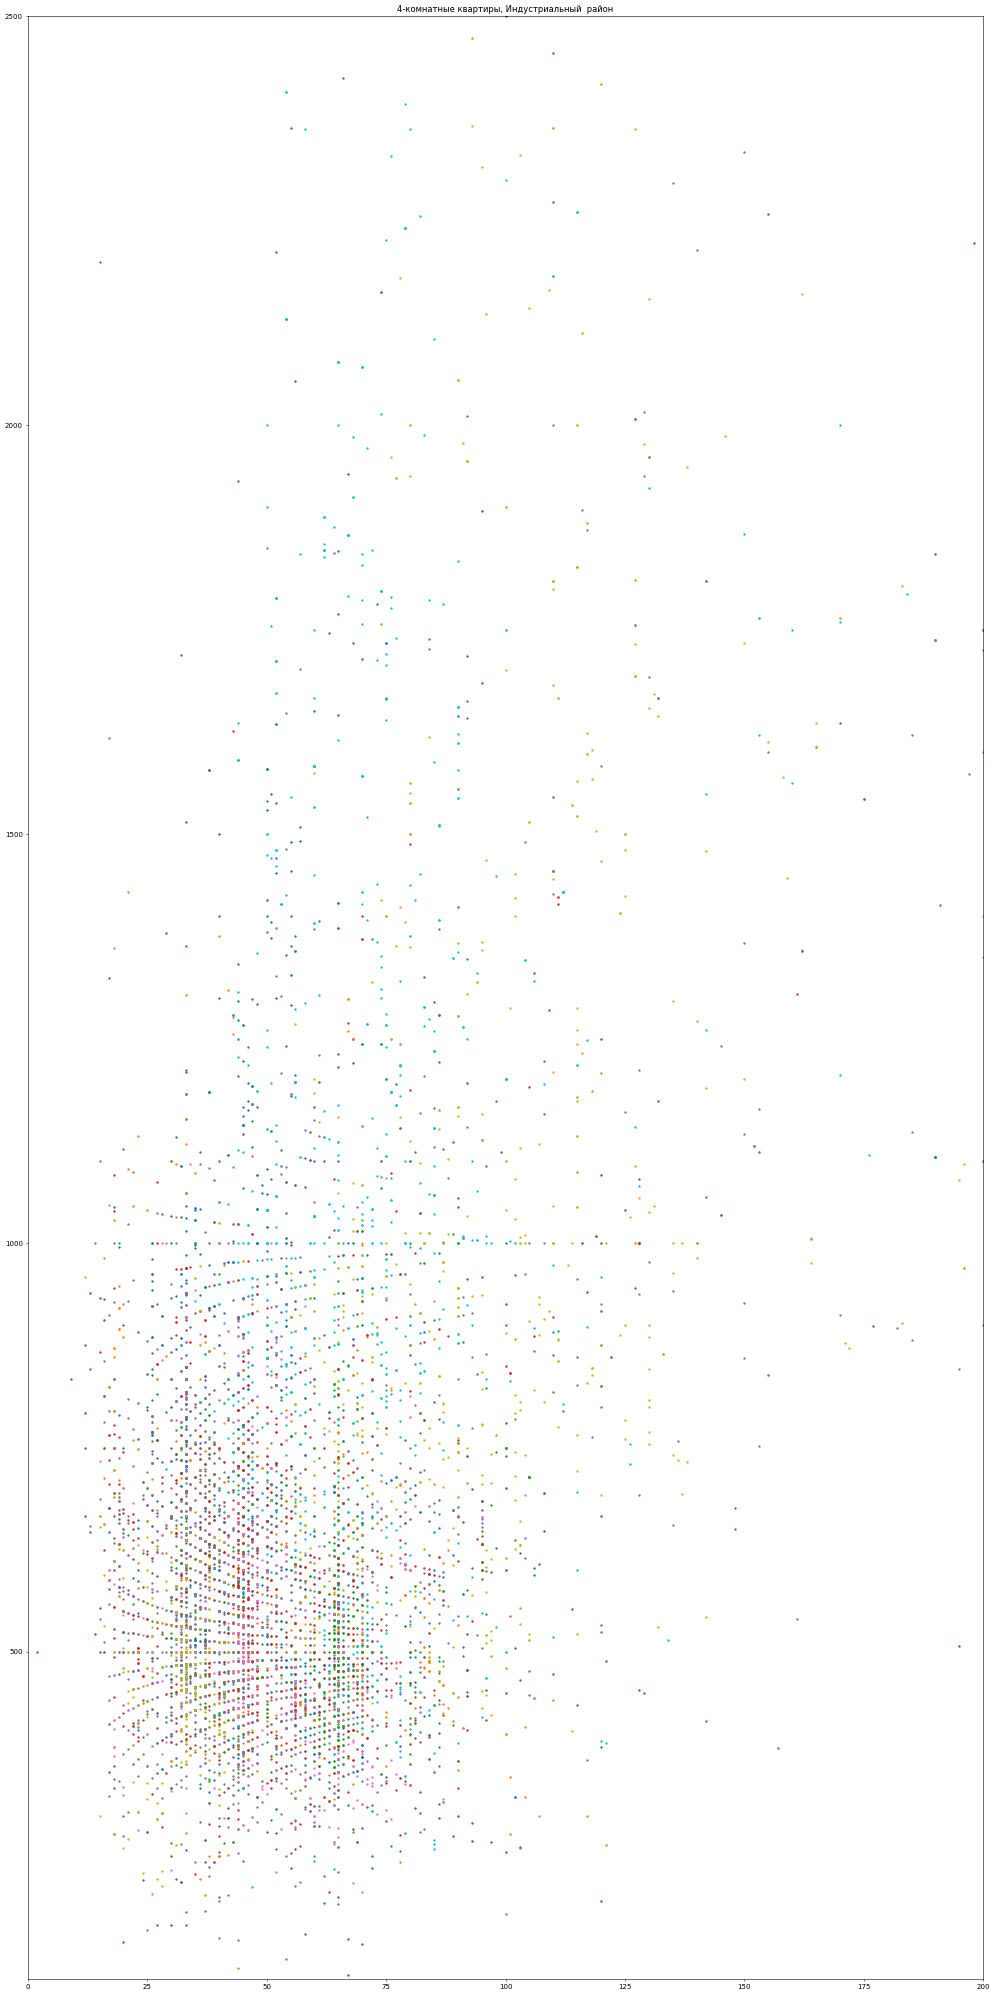

In [77]:
counter = Counter(data['district'])
district_names = counter.keys()

plt.figure(figsize=(20, 40), dpi=50, facecolor='white')


for room in range(1, 5):
    
    for district in district_names:
        price_USD_by_district = price_USD[price_USD.district == district]
        price_square_meter = price_USD_by_district.price / price_USD_by_district.total_area
        plt.subplot(4,1,room)
        filter_parameter = data.rooms == room
        plt.title('{0}-комнатные квартиры, {1} район'.format(room, district))
        plt.scatter(price_USD_by_district.total_area[filter_parameter], price_square_meter[filter_parameter], 5)
        plt.xlim(0, 200)
        plt.ylim(100, 2500)
        plt.tight_layout()
plt.show()